# Анализ лояльности пользователей Яндекс Афиши

- Автор: Попов Егор Валерьевич
- Дата: 22.01.2026

### Цели и задачи проекта

**Цель**: провести исследовательский анализ данных, чтобы понять, какие пользователи с большей вероятностью возвращаются на платформу и делают заказы повторно.

**Задачи:**

1. С помощью SQL-запроса, выгрузить в датафрейм pandas необходимые данные из базы `data-analyst-afisha`, изучить общую информацию о выгруженных данных и оценить корректность выгрузки и объём полученных данных.


2. Провести предобработку данных.

    - привести выручку к единой валюте — российскому рублю;
    - изучить пропущенные значения и при необходимости обработать пропуски;
    - изучить корректность типов данных и при необходимости преобразовать;
    - изучить значения в ключевых столбцах и выявлении ошибок устранить их;
    - проверить данные на явные и неявные дубликаты;
    - изучить значения в ключевых столбцах. Для категоральных столбцов провести нормализацию, а для числовых рассмотреть их распределение и наличие в них выбросов.


3. Создать профиль пользователя по агрегированным признакам, описывающим его поведение. Для каждого пользователя найти:
    - дату первого и последнего заказа;
    - устройство, с которого был сделан первый заказ;
    - регион, в котором был сделан первый заказ;
    - билетного партнёра, к которому обращались при первом заказе;
    - жанр первого посещённого мероприятия (по полю event_type_main);
    - общее количество заказов;
    - среднюю выручку с одного заказа в рублях;
    - среднее количество билетов в заказе;
    - среднее время между заказами. 
    - добавить бинарные признаки: `is_two` — совершил ли пользователь 2 и более заказа, `is_five` — совершил ли пользователь 5 и более заказов.

   Для оценки репрезентативности сформированных профилей пользователей и проверки их на аномалые значения необходимо рассчитать:
   
    - общее число пользователей в выборке;
    - среднюю выручку с одного заказа;
    - долю пользователей, совершивших 2 и более заказа;
    - долю пользователей, совершивших 5 и более заказов;
    - статистические показатели (по общему числу заказов; по среднему числу билетов в заказе; по среднему количеству дней между покупками).
    
    
    
4. Провести исследовательский анализ данных:
    - 4.1. Исследовать признаки первого заказа и их связи с возвращением на платформу:
        - изучить распределение пользователей по различным признакам. Для этого необходимо сгрупировать пользователей по сегментам и расчитать общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака;
        - проанализировать возвраты пользователей. Для каждого сегмента вычислить долю пользователей, совершивших два и более заказа;
        - проверить продуктовые гипотезы (формулировки гипотез будут приведены в разделе посвященном ИАД).
    - 4.2. Исследовать поведение пользователей через показатели выручки и состава заказа:
        - изучить количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают;
        - проследить связь между средней выручкой сервиса с заказа и повторными заказами;
        - сравнить распределение по средней выручке с заказа в двух группах пользователей: совершившие 2–4 заказа и совершившие 5 и более заказов;
        - проанализировать влияние среднего количества билетов в заказе на вероятность повторной покупки;
    - 4.3. Исследовать временные характеристики первого заказа и их влияния на повторные покупки:
        - изучить временные параметры, связанные с первым заказом пользователей;
        - проанализировать, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей;
        - изучить, как средний интервал между заказами влияет на удержание клиентов.
    - 4.4. Провести корреляционный анализ количества покупок и признаков пользователя.
    
5. Сформулировать общие выводы и рекомендации по проведённому анализу.

### Описание данных

Необходимые для анализа данные сервиса **Яндекс Афиша** представлены в базе данных PostgreSQL `data-analyst-afisha`. Подключение к БД осуществлялось с помощью программы **DBeaver**.

Схема `afisha` базы данных `data-analyst-afisha` содержит пять таблиц.

Таблица `purchases` содержит информацию о заказах билетов:

- `order_id` - идентификатор заказа;  
- `user_id` - идентификатор пользователя, совершившего заказ;  
- `created_dt_msk` - дата создания заказа по московскому времени;  
- `created_ts_msk` - дата и время создания заказа по московскому времени;  
- `event_id` - идентификатор мероприятия из таблицы `events`;  
- `cinema_circuit` - сеть кинотеатров, где проходит мероприятие. Если оно проходит не в кинотеатре, то здесь будет значение нет;  
- `age_limit` - возрастное ограничение мероприятия;  
- `currency_code` - валюта оплаты;  
- `device_type_canonical` - тип устройства, с которого был оформлен заказ (например, `mobile` - мобильные устройства, `desktop` - компьютеры);  
- `revenue` - выручка от заказа;  
- `service_name` - название билетного оператора;  
- `tickets_count` - количество купленных билетов;  
- `total` - общая сумма заказа.

Таблица `events` содержит данные о мероприятиях, доступных на платформе:

- `event_id` - идентификатор мероприятия.  
- `event_name_code` - название мероприятия в закодированном виде.  
- `event_type_description` — описание мероприятия.  
- `event_type_main` - основной тип мероприятия (театральная постановка, концерт и так далее)  
- `organizers` - организаторы мероприятия.  
- `city_id` - идентификатор города проведения мероприятия из таблицы `cities`.  
- `venue_id` - идентификатор площадки проведения мероприятия из таблицы `venues`.

Таблица `venues` содержит сведения о площадках проведения мероприятий:

- `venue_id` - идентификатор площадки;  
- `venue_name` - название площадки;  
- `address` - адрес площадки.

Таблица `city` содержит список городов, относящихся к регионам:

- `city_id` - идентификатор города;  
- `city_name` - название города;  
- `region_id` - идентификатор региона, в котором расположен город, из таблицы `regions`.

Таблица `regions` содержит список регионов, в которых проводятся мероприятия:

- `region_id` - идентификатор региона;  
- `region_name` - название региона.


### Содержимое проекта

<a id="toc"></a>
- [1. Загрузка данных и знакомство с ними](#загрузка-данных-и-знакомство-с-ними)
    - [1.1. Выгрузка в датафрейм pandas необходимых для анализа данных](#выгрузка-в-датафрейм-pandas-необходимых-для-анализа-данных)
    - [1.2. Общая информация о выгруженных данных](#общая-информация-о-выгруженных-данных)
- [2. Предобработка данных](#предобработка-данных)
    - [2.1. Приведение выручки к единой валюте](#приведение-выручки-к-единой-валюте)
    - [2.2. Проверка данных на пропущенные значения](#проверка-данных-на-пропущенные-значения)
    - [2.3 Обработка явных и неявных дубликатов](#обработка-явных-и-неявных-дубликатов)
    - [2.4. Преобразование типов данных](#преобразование-типов-данных)
    - [2.5. Изучение значений в ключевых столбцах и обработка ошибок](#изучение-значений-в-ключевых-столбцах-и-обработка-ошибок)
- [3. Создание профиля пользователя](#создание-профиля-пользователя)
    - [3.1. Построение профиля пользователя](#построение-профиля-пользователя)
    - [3.2. Оценка репрезентативности профиля пользователя](#оценка-репрезентативности-профиля-пользователя)
- [4. Исследовательский анализ данных](#исследовательский-анализ-данных)
    - [4.1. Исследование признаков первого заказа и их связи с возвращением на платформу](#исследование-признаков-первого-заказа-и-их-связи-с-возвращением-на-платформу)
        - [4.1.1. Изучение распределения пользователей по признакам](#изучение-распределения-пользователей-по-признакам)
        - [4.1.2. Анализ возвратов пользователей](#анализ-возвратов-пользователей)
        - [4.1.3. Проверка продуктовых гипотез](#проверка-продуктовых-гипотез)
    - [4.2. Исследование поведения пользователей через показатели выручки и состава заказа](#исследование-поведения-пользователей-через-показатели-выручки-и-состава-заказа)
        - [4.2.1. Исследование связи между средней выручкой сервиса с заказа и повторными заказами](#исследование-связи-между-средней-выручкой-сервиса-с-заказа-и-повторными-заказами)
        - [4.2.2. Сравнение распределения по средней выручке с заказа в выделенных группах пользователей](#cравнение-распределения-по-средней-выручке-с-заказа-в-выделенных-группах-пользователей)
        - [4.2.3. Анализ влияния среднего количества билетов в заказе на вероятность повторной покупки](#анализ-влияния-среднего-количества-билетов-в-заказе-на-вероятность-повторной-покупки)
    - [4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки](#исследование-временных-характеристик-первого-заказа-и-их-влияния-на-повторные-покупки)
        - [4.3.1. Анализ влияния дня недели, в который была совершена первая покупка на поведение пользователей](#анализ-влияния-дня-недели-в-который-была-совершена-первая-покупка-на-поведение-пользователей)
        - [4.3.2. Исследование влияния среднего интервала между заказами на удержание клиентов](#исследование-влияния-среднего-интервала-между-заказами-на-удержание-клиентов)
    - [4.4. Корреляционный анализ количества покупок и признаков пользователя](#корреляционный-анализ-количества-покупок-и-признаков-пользователя)
- [5. Общие выводы и рекомендации](#общие-выводы-и-рекомендации)
-[6. Финализация проекта и публикация в Git](#финализация-проекта-и-публикация)
        
        

<a id="загрузка-данных-и-знакомство-с-ними"></a>
## 1. Загрузка данных и знакомство с ними

Перед исследовательским анализом необходимо выгрузить данные из БД Яндекс Афиши с помощью SQL. В этом разделе подготовим необходимые поля, которые позволят изучить поведение пользователей и понять, кто чаще возвращается на платформу и в силу каких факторов. После выгрузки приведем общую информацию о выгруженных данных и изучим их корректность и объем.

<a id="выгрузка-в-датафрейм-pandas-необходимых-для-анализа-данных"></a>
### 1.1. Выгрузка в датафрейм pandas необходимых для анализа данных

Импортируем необходимые для работы с проектом библиотеки и модули.

In [1]:
# Импортируем библиотеку для работы с датафреймами
import pandas as pd

# Импортируем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Импортируем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

# Импортируем модуль для подключения к БД
from sqlalchemy import create_engine 

Подключимся к базе данных `data-analyst-afisha`.

In [2]:
# Конфигурация подключения
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-afisha' # название базы данных
             }

# Строка для подключения
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

# Произведем подключение
engine = create_engine(connection_string)

Пропишем SQL-запрос для извлечения необходимых данных из `data-analyst-afisha`. Стоит отметить, что при выгрузке учитываются только заказы, совершённые с **мобильных** и **десктопных** устройств. С других типов устройств заказов было совершено слишком мало, поэтому их в рамках дальнейшего анализа не учитываем. Также из данных были исключены заказы билетов на **фильмы**, так как по ним недостаточно данных.

In [3]:
# SQL-запрос
query = '''
SELECT 
   p.user_id,
   p.device_type_canonical,
   p.order_id,
   p.created_dt_msk AS order_dt,
   p.created_ts_msk AS order_ts,
   p.currency_code,
   p.revenue,
   p.tickets_count,
   p.created_dt_msk::date - 
   LAG(p.created_dt_msk::date) OVER(PARTITION BY user_id ORDER BY p.created_dt_msk)
   AS days_since_prev,
   e.event_id,
   e.event_name_code AS event_name,
   e.event_type_main,
   p.service_name,
   r.region_name,
   c.city_name
FROM afisha.purchases AS p
LEFT JOIN afisha.events AS e USING(event_id)
LEFT JOIN afisha.city AS c USING(city_id)
LEFT JOIN afisha.regions AS r USING(region_id)
WHERE (device_type_canonical IN ('mobile', 'desktop')) AND (event_type_main <> 'фильм')
ORDER BY user_id;
'''

In [4]:
# Запишем результат выдачи SQL-запроса в датафрейм
df = pd.read_sql_query(query, con=engine)

# Сохраним непредобработанный датафрейм
raw_df = df.copy()

[Назад к оглавлению](#toc)

<a id="общая-информация-о-выгруженных-данных"></a>
### 1.2. Общая информация о выгруженных данных

Выгрузка из базы данных SQL позволила собрать следующие данные:
- `user_id` - уникальный идентификатор пользователя, совершившего заказ;  
- `device_type_canonical` - тип устройства, с которого был оформлен заказ (`mobile` - мобильные устройства, `desktop` - стационарные);  
- `order_id` - уникальный идентификатор заказа;  
- `order_dt` - дата создания заказа (использованы данные `created_dt_msk`);  
- `order_ts` - дата и время создания заказа (использованы данные `created_ts_msk`);  
- `currency_code` - валюта оплаты;  
- `revenue` - выручка от заказа;  
- `tickets_count` - количество купленных билетов;  
- `days_since_prev` - количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой - значение пропущено;  
- `event_id` - уникальный идентификатор мероприятия;
- `event_name` - название мероприятия в закодированном виде;
- `service_name` - название билетного оператора;  
- `event_type_main` - основной тип мероприятия (театральная постановка, концерт и так далее);  
- `region_name` - название региона, в котором прошло мероприятие;  
- `city_name` - название города, в котором прошло мероприятие.

Познакомимся с данными, представленными в `df`. Выведем первые 5 строк датафрейма, а также общую информацию о нем.

In [5]:
# Первые 5 строк датафрейма df
df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Озернинский край,Родниковецк


In [6]:
# Общая информация о датафрейме df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

---
### Промежуточный вывод

Датафрейм содержит **290611 строк** и **15 столбцов**. Названия столбцов приведены к snake_case и по смыслу соответствуют, содержащимся в них данным. В столбце `days_since_prev` присутствуют пропуски. Типы данных в столбцах выбраны верно, однако целесообразно на этапе предобработки числовые данные оптимизовать путем понижения разрядности.

[Назад к оглавлению](#toc)

<a id="предобработка-данных"></a>
## 2. Предобработка данных

Детально изучим данные датасета `df` и проведем их предобработку, которая будет включать в себя проверку типов данных столбцов, исследование пропусков в данных, выявление явных и неявных дубликатов, изучение данных в ключевых столбцах и др.

<a id="приведение-выручки-к-единой-валюте"></a>
### 2.1. Приведение выручки к единой валюте

На этапе работы с данными в базе данных PostgreSQL `data-analyst-afisha` было выявлено, что данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Для валидности дальнейшего анализа необходимо привести выручку к единой валюте — российскому рублю.

Для преобразования будем использовать данные датасета `final_tickets_tenge_df.csv` с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год.

In [7]:
# Загружаем датасет в переменную currency_conversion_df
currency_conversion_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

Познакомимся с данными, представленными в `currency_conversion_df`. Выведем первые 5 строк датафрейма, а также общую информацию о нем.

In [8]:
# Первые 5 строк датафрейма currency_conversion_df
currency_conversion_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [9]:
# Общая информация о датафрейме currency_conversion_df
currency_conversion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Дадим краткое описание данных, представленных в датасете `currency_conversion_df`:
- **Полнота данных**: датасет  содержит 357 строк и 4 столбца. Количество строк датасета не совпадает с количеством дней в високосном 2024 году (366 дней). Это может говорить об остутствии в датасете некоторых дат.
- **Пропуски**: датасет не содержит пропусков.
- **Наименования столбцов**: названия столбцов по смыслу соответствуют, содержащимся в них данным.
- **Типы данных**: типы данных во всех столбцах кроме `datа`, указывающего день 2024 года, представлены верно. Необходимо привести данные в указанном столбце к типу `datetime64`.

Исследуем датасет `currency_conversion_df` на наличие явных и неявных дубликатов. Для выявления неявных дубликатов нормализуем данные в столбце `data`. Строки с одинаковыми значениями в указанном столбце будем считать неявными дупликатами.

In [10]:
# Количество явных дубликатов
print(f'Количество явных дубликатов: {currency_conversion_df.duplicated().sum()}')

Количество явных дубликатов: 0


In [11]:
# Приводим к нижнему регисттру
currency_conversion_df['data'] = currency_conversion_df['data'].str.lower()
# Удаляем пробелы слева и справа
currency_conversion_df['data'] = currency_conversion_df['data'].str.strip()

# Количество неявных дубликатов после нормализации
print(f'Количество неявных дубликатов: {currency_conversion_df['data'].duplicated().sum()}')

Количество неявных дубликатов: 0


Преобразуем тип данных в столбце `data` к `datetime64`

In [12]:
# Преобразование типа
currency_conversion_df['data'] = pd.to_datetime(currency_conversion_df['data'])
# Проверка типа данных после преобразования
print(f"Тип данных в столбце 'data': {currency_conversion_df['data'].dtype}")

Тип данных в столбце 'data': datetime64[ns]


Проверим каких дат недостает в датасете `currency_conversion_df`.

In [13]:
# все даты 2024 года
full_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
# Записываем недостающие даты в новую переменную
missing_dates = full_2024.difference(currency_conversion_df['data'])
# Вывод результата
if missing_dates.empty:
    print("Все дни 2024 года присутствуют")
else:
    print(f"В датасете 'currency_conversion_df' отсутствует {len(missing_dates)} дат:")
    for date in missing_dates:
        print(date)

В датасете 'currency_conversion_df' отсутствует 9 дат:
2024-01-01 00:00:00
2024-01-02 00:00:00
2024-01-03 00:00:00
2024-01-04 00:00:00
2024-01-05 00:00:00
2024-01-06 00:00:00
2024-01-07 00:00:00
2024-01-08 00:00:00
2024-01-09 00:00:00


В датафрейме `currency_conversion_df` отсутствуют данные о курсе валют для первых 9 дней 2024 года. При наличии в датафрейме `df` заказов, которые были оплаченны в тенге в указанные даты конвертация в рубли по курсу из `currency_conversion_df` не может быть проведена.

Теперь приведем выручку к единой валюте - российскому рублю. Для этого объединим датафреймы `df` и `currency_conversion_df`.

In [14]:
# Объединяем датафреймы df и currency_conversion_df
df = pd.merge(df,
              currency_conversion_df,
              left_on = ['order_dt', 'currency_code'],
              right_on = ['data', 'cdx'],
              how = 'left')

Проведем конвертацию для заказов оплаченных в тенге и сохраним полученные данные в новый столбец `revenue_rub`.

In [15]:
# Конвертация заказов из тенге в рубли
df['revenue_rub'] = df['revenue'] * df['curs'] / df['nominal']
# Для заказов в рублях заполняем пропуски на значение из revenue
df['revenue_rub'] = df['revenue_rub'].fillna(df['revenue'])
# После конвертации удалим лишние столбцы из датафрейма df
df = df.drop(columns = ['data', 'nominal', 'curs', 'cdx'])
# Выведем несколько строк датафрейма
df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Каменевский регион,Глиногорск,1521.94
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Каменевский регион,Глиногорск,289.45
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Каменевский регион,Глиногорск,1258.57
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Североярская область,Озёрск,8.49
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Озернинский край,Родниковецк,1390.41


[Назад к оглавлению](#toc)

<a id="проверка-данных-на-пропущенные-значения"></a>
### 2.2.  Проверка данных на пропущенные значения

Изучим пропущенные значения в данных. Для начала посчитаем количество пропусков в каждом из столбцов.

In [16]:
# Создадим функцию для отрображения количества пропусков в абсолютных и относительных значениях
def show_missing_stats(my_df):
    # Датафрейм с кол-вом пропусков по каждому столбцу
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': my_df.isnull().sum(),
        'Доля пропусков': my_df.isnull().mean()
    })
    missing_stats = missing_stats.loc[missing_stats['Кол-во пропусков'] > 0]
    
    if missing_stats.empty:
        return "Пропусков в данных нет"
    
    # Форматируем при выводе через Styler
    return (missing_stats.style
            .format({'Доля пропусков': '{:.2f}'})
            .background_gradient(cmap='Blues'))

# Выполняем функцию
show_missing_stats(df)

,Кол-во пропусков,Доля пропусков
days_since_prev,21933,0.08


Пропуски в датафрейме `df` наблюдаются только в столбце `days_since_prev`, который отражает информацию о количестве дней от предыдущей покупки пользователя. Доля пропусков в указанном столбце составляет около 8%. Пропуски обусловлены спецификой столбца - для пользователей, совершивших одну покупку невозможно привести никакой информации.

[Назад к оглавлению](#toc)

<a id="обработка-явных-и-неявных-дубликатов"></a>
### 2.3. Обработка явных и неявных дубликатов

Проверим данные в `df` на явные дубликаты

In [17]:
# Количество явных дубликатов
print(f'Количество явных дубликатов: {df.duplicated().sum()}')

Количество явных дубликатов: 0


Явных дубликатов не обнаружено. Теперь проверим данные из `df` на неявные дубликаты. Для этого нормализуем данные в текстовых столбцах и проверим наличие дубликатов.

In [18]:
# Нормализуем данные в текстовых столбцах
for col in df.columns:
    if df[col].dtype == 'object':
        # Приводим к нижнему регисттру
        df[col] = df[col].str.lower()
        # Удаляем пробелы слева и справа
        df[col] = df[col].str.strip()
        
# Количество неявных дубликатов
print(f'Количество неявных дубликатов: {df.duplicated().sum()}')

Количество неявных дубликатов: 0


Неявных дубликатов также не было обнаружено.

[Назад к оглавлению](#toc)

<a id="преобразование-типов-данных"></a>
### 2.4. Преобразование типов данных

Внимательно изучим типы данных столбцов в датафрейме `df`:
- **Строковый тип данных** (`object`): столбцы `user_id`, `device_type_canonical`, `currency_code`, `event_name`, `event_type_main`, `service_name`, `region_name`, `city_name` отражают стороковую информацию, ввиду чего для них тип данных выбран верно. При этом в столбцах `device_type_canonical`, `currency_code` и `event_type_main` ожидается небольшое количество уникальных значений и приведение данных в указанных столбцах к типу `category` может значительно сэкономить память.
- **Числовой тип данных**:
    - Целочисленный (`int64`): столбцы `order_id`, `tickets_count`, `event_id` показывают id заказа, количество купленных билетов и id мероприятия соотвественно. Такую информацию логично хранить в целочисленном типе данных, однако целесообразно оптимизировать их путем понижения разрядности.
    - С плавающей точкой (`float64`): столбцы `revenue`, `days_since_prev` и `revenue_rub`  отражают числовую информацию о выручке и количество дней от предыдущей покупки пользователя. Данные в столбце `days_since_prev` по своей сути показывают целочисленную информацию, однако ввиду наличия пропусков они автоматически при создании датафрейма были преобразованы в `float64`. Как и для целочисленных данных актуально будет оптимизировать данные путем понижения разрядности.
- **Тип данных для хранения даты и времени** (`datetime64`): столбцы `order_dt` и `order_ts` хранят информацию о дате и времени создания заказа, ввиду чего для них тип данных выбран верно.

Проверим количество уникальных значений в столбцах типа `object`.

In [19]:
# Формируем словарь для создания датафрейма со сведениями об уникальных значениях столбцов типа object
keys = ["Наименование столбца ('object')", 'Кол-во уникальных значений', 'Доля уникальных значений, %']
unique_object_data = {key: [] for key in keys}
for col in df.columns:
    if df[col].dtype == 'object':
        unique_object_data["Наименование столбца ('object')"].append(col)
        unique_object_data["Кол-во уникальных значений"].append(df[col].nunique())
        unique_object_data["Доля уникальных значений, %"].append(round(df[col].nunique() / df.shape[0] * 100, 2))

# Создаем датафрейм со сведениями об уникальных значениях столбцов типа object         
unique_object_df = pd.DataFrame(unique_object_data)
# Сортируем и выводим данные созданного датафрейма
unique_object_df.sort_values(by='Кол-во уникальных значений')

,Наименование столбца ('object'),Кол-во уникальных значений,"Доля уникальных значений, %"
1,device_type_canonical,2,0.00
2,currency_code,2,0.00
4,event_type_main,7,0.00
5,service_name,36,0.01
6,region_name,81,0.03
7,city_name,352,0.12
3,event_name,15248,5.25
0,user_id,21933,7.55


Видим, что количество уникальных значений для столбцов `device_type_canonical`, `currency_code` и `event_type_main` не превышает значения 7 шт. на 290611 строк, что составляет менее сотой процента от всех строк датафрейма. Для экономии памяти целесообразно преобразовать данные в таких столбцах к типу `category`.

In [20]:
# Преобразуем к типу category данные в столбцах device_type_canonical, currency_code и event_type_main
for col in ['device_type_canonical', 'currency_code', 'event_type_main']:
    df[col] = df[col].astype('category')
    print(f'Тип данных столбца {col}: {df[col].dtype}')

Тип данных столбца device_type_canonical: category
Тип данных столбца currency_code: category
Тип данных столбца event_type_main: category


Оптимизируем целочисленный тип данных в столбцах `order_id`, `tickets_count` и `event_id`.

In [21]:
for col in df.columns:
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast ='integer')
        print(f'Столбец {col} после оптимизации приведен к типу {df[col].dtype}')

Столбец order_id после оптимизации приведен к типу int32
Столбец tickets_count после оптимизации приведен к типу int8
Столбец event_id после оптимизации приведен к типу int32


Оптимизируем числа с плавающей точкой в столбцах `revenue`, `days_since_prev` и `revenue_rub`.

In [22]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast ='float')
        print(f'Столбец {col} после оптимизации приведен к типу {df[col].dtype}')

Столбец revenue после оптимизации приведен к типу float64
Столбец days_since_prev после оптимизации приведен к типу float32
Столбец revenue_rub после оптимизации приведен к типу float64


Выведем информацию о датафрейме `df` после преобразований типов данных.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  category      
 2   order_id               290611 non-null  int32         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  category      
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int8          
 8   days_since_prev        268678 non-null  float32       
 9   event_id               290611 non-null  int32         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  category      
 12  service_name           290611 non-null  obje

В итоге после преобразований типов данных получили следующее:
- Разрядность столбца `tickets_count` понижена до `int8`;
- Разрядность столбцов `event_id` и `order_id` понижена до `int32`;
- Разрядность столбца `days_since_prev` понижена до `float32`;
- Столбцы `device_type_canonical`, `currency_code` и `event_type_main` приведены к типу `category`

После преобразования типов можно отметить уменьшение объема памяти, занимаемой `df`. Узнаем насколько удалось сэкономить память, для этого сравним `df` с исходным датафреймом `raw_df`.

In [24]:
memory_usage_raw_df = raw_df.memory_usage(deep=True).sum() / (1024 ** 2)
memory_usage_df = df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f'Занимаемая память исходным датафреймом raw_df: {raw_df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} МБ.')
print(f'Занимаемая память преобразованным датафреймом df: {memory_usage_df:.2f} МБ.')
print(f'В абсолютном значении удалось уменьшить объем занимаемой памяти на {memory_usage_raw_df - memory_usage_df:.2f} МБ.')
print(f'В относительном значении удалось уменьшить объем занимаемой памяти на {(1 - memory_usage_df / memory_usage_raw_df):.2%}.')


Занимаемая память исходным датафреймом raw_df: 212.00 МБ.
Занимаемая память преобразованным датафреймом df: 154.24 МБ.
В абсолютном значении удалось уменьшить объем занимаемой памяти на 57.76 МБ.
В относительном значении удалось уменьшить объем занимаемой памяти на 27.24%.


[Назад к оглавлению](#toc)

<a id="изучение-значений-в-ключевых-столбцах-и-обработка-ошибок"></a>
### 2.5. Изучение значений в ключевых столбцах и обработка ошибок

Исследуем значения представленные в столбцах для работы с датой и временем (`order_dt` и `order_ts`). Значения в указанных столбцах должны быть пределах от 01.01.24 до 31.12.2024.

In [25]:
# Проверим все ли даты принадлежат 2024 году
if df.loc[df['order_dt'].dt.year != 2024].empty and df.loc[df['order_ts'].dt.year != 2024].empty:
    print('Все значения столбцов order_dt и order_ts содержат информацию о датах 2024 года')

Все значения столбцов order_dt и order_ts содержат информацию о датах 2024 года


Изучим какие значения категориальных данных (тип `category`) присутствуют в датафрейме и исследуем частоту их появления в датасете.

In [26]:
# Проверим категориальные данные
for col in df.columns:
    if df[col].dtype == 'category':
        print(f'Уникальные значения столбца {col}: {df[col].unique().tolist()}')

Уникальные значения столбца device_type_canonical: ['mobile', 'desktop']
Уникальные значения столбца currency_code: ['rub', 'kzt']
Уникальные значения столбца event_type_main: ['театр', 'выставки', 'другое', 'стендап', 'концерты', 'спорт', 'ёлки']


Из результатов видно, что рассматриваемые столбцы не имеют дублирования или некорректного написания категорий.

Рассмотрим основные статистические показатели категориальных столбцов.

In [27]:
# Cтатистика по категориальным столбцам
category_info = df.describe(include = 'category').T
# Частоту переведем в относительные значения
category_info['freq'] = category_info['freq'] / df.shape[0]
# Выводим, форматируя столбец freq
category_info.style.format({'freq': '{:.1%}'})

,count,unique,top,freq
device_type_canonical,290611,2,mobile,80.0%
currency_code,290611,2,rub,98.3%
event_type_main,290611,7,концерты,39.7%


Изучим какие значения текстовых данных (тип `object`) присутствуют в датафрейме. Отметим, что рассматривать уникальные значения в столбцах `user_id` и `event_name` не имеет смысла т.к. это уникальные идентификаторы.

In [28]:
# Проверим уникальные значения текстовых данных
for col in df.columns:
    if (df[col].dtype == 'object') and (col != 'user_id') and (col != 'event_name'):
        print(f'Уникальные значения столбца {col}')
        print(sorted(df[col].unique()))
        print()

Уникальные значения столбца service_name
['crazy ticket!', 'show_ticket', 'билет по телефону', 'билеты без проблем', 'билеты в интернете', 'билеты в руки', 'быстробилет', 'быстрый кассир', 'весь в билетах', 'восьмёрка', 'вперёд!', 'выступления.ру', 'городской дом культуры', 'дом культуры', 'дырокол', 'за билетом!', 'зе бест!', 'карандашру', 'кино билет', 'край билетов', 'лимоны', 'лови билет!', 'лучшие билеты', 'мир касс', 'мой билет', 'облачко', 'прачечная', 'радио ticket', 'реестр', 'росбилет', 'тебе билет!', 'телебилет', 'тех билет', 'цвет и билет', 'шоу начинается!', 'яблоко']

Уникальные значения столбца region_name
['белоярская область', 'берестовский округ', 'берёзовская область', 'боровлянский край', 'верховинская область', 'верхозёрский край', 'верхоречная область', 'ветренский регион', 'вишнёвский край', 'глиногорская область', 'голубевский округ', 'горицветская область', 'горноземский регион', 'горностепной регион', 'дальнеземская область', 'дальнезорский край', 'дубравная о

Из результатов вывода уникальных значений столбца `service_name` видно, что рассматриваемые столбцы не имеют дублирования или некорректного написания. Однако стоит отметить, что ввиду сохранения конфеденциальности сведений значения для столбцов `region_name` и `city_name`были заменены на несуществующие наименования и поэтому такие данные сложно корректно проверить на адекватность написания.

Исследуем долю вхождений уникальных наименований из столбцов `service_name`, `region_name` и `city_name` в датафрейм.

In [29]:
# Функция для расчета доли вхождений уникальных наименований
def share_unique_value(my_df, col_name):
    share_unique_df = my_df[col_name].value_counts(normalize = True).sort_values(ascending = False).reset_index()
    share_unique_df = share_unique_df.rename(columns={'proportion': 'Доля вхождений'})
    return share_unique_df.style.format({'Доля вхождений': '{:.2%}'}).background_gradient(cmap='Blues')

for col in ['service_name', 'region_name', 'region_name']:
    display(share_unique_value(df, col))

,service_name,Доля вхождений
0,билеты без проблем,21.86%
1,лови билет!,14.15%
2,билеты в руки,13.88%
3,мой билет,11.99%
4,облачко,9.17%
5,лучшие билеты,6.12%
6,весь в билетах,5.80%
7,прачечная,3.53%
8,край билетов,2.14%
9,тебе билет!,1.80%


,region_name,Доля вхождений
0,каменевский регион,31.33%
1,североярская область,15.16%
2,широковская область,5.66%
3,медовская область,4.78%
4,озернинский край,3.60%
5,светополянский округ,2.62%
6,малиновоярский округ,2.28%
7,речиновская область,2.17%
8,солнечноземская область,2.16%
9,яблоневская область,2.13%


,region_name,Доля вхождений
0,каменевский регион,31.33%
1,североярская область,15.16%
2,широковская область,5.66%
3,медовская область,4.78%
4,озернинский край,3.60%
5,светополянский округ,2.62%
6,малиновоярский округ,2.28%
7,речиновская область,2.17%
8,солнечноземская область,2.16%
9,яблоневская область,2.13%


Изучим значения в ключевых числовых столбцах датафрейма (`tickets_count`, `days_since_prev`, `revenue_rub`). Для этого выведем описательные статистические данные о значениях в этих столбцах.

In [30]:
# Выведем статистические данные о числовых столбцах
df[['tickets_count', 'days_since_prev', 'revenue_rub']].describe().style.format('{:.2f}')

,tickets_count,days_since_prev,revenue_rub
count,290611.00,268678.00,290611.00
mean,2.75,3.22,555.57
std,1.17,11.35,875.50
min,1.00,0.00,-90.76
25%,2.00,0.00,113.97
50%,3.00,0.00,351.14
75%,4.00,1.00,802.05
max,57.00,148.00,81174.54


По полученным данным можно отметить следующее:
- **столбец `revenue_rub`**: отрицательное минимальное значение (-90.76) не характерно для столбца с выручкой (возможно отрицательные значения - это возвраты). Максимальное значение (81174.54) на 2 порядка больше медианы (351.14) и среднего (555.57), что может говорить о наличии выбросов. При этом среднее значение больше медианы, поэтому можно ожидать правое асиметричное распределение.
- **столбец `days_since_prev`**: так как медиана имеет нулевое значение можно предположить, что более половины пользователей, имеющих более двух покупок, делают несколько заказов в день. Максимальное значение (148.00) значительно превышает как медиану, так и среднее значение (3.22), что может говорить о наличии выбросов. Учитывая то, что среднее значение больше медианы, можно ожидать правое асиметричное распределение.
- **столбец `tickets_count`**: Макисмальное значение (57) значительно превышает как среднее (2.75), так и медиану (3.00). Среднее значение в свою очередь близко к медиане ввиду чего можно ожидать симметричный вид распределения.

Изучим уникальные значения представленные в ключевых числовых столбцах датафрейма (`tickets_count`, `days_since_prev`, `revenue_rub`).

In [31]:
# Проверим уникальные значения числовых данных
for col in ['tickets_count', 'days_since_prev', 'revenue_rub']:
    print(f'Уникальные значения столбца {col}')
    print(sorted(df[col].unique().tolist()))
    print()

Уникальные значения столбца tickets_count
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 27, 30, 37, 47, 57]

Уникальные значения столбца days_since_prev
[0.0, 2.0, 3.0, 16.0, 19.0, nan, 1.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 17.0, 18.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0,

Полученные уникальные значения столбцов `tickets_count`, `days_since_prev` не содержат ошибок, однако в каждом наборе данных присутствуют значения значительно превышающие как медиану, так и среднее, ввиду чего ожидается наличие выбросов.

Уникальные значения столбца `revenue_rub` содержат отрицательные значения, которые, как было отмечено ранее, могут быть обусловлены возвратами средств за билеты. Целесообразно исключить из датасета строки с отрицательными значениями т.к. они не являются репрезентативны с точки зрения исследования вероятности возврата пользователя, а также могут исказить статистические показатели столбца `revenue_rub`. Также в наборе данных присутствуют значения значительно превышающие как медиану, так и среднее, ввиду чего ожидается наличие выбросов.

Оценим объем данных с отрицательными значениями выручки за заказ в столбце `revenue_rub`.

In [32]:
# Объем данных с отрицательными значениями выручки за заказ в столбце revenue_rub
print(f"Количество строк с отрицательными значениями в столбце 'revenue_rub': {df.loc[df['revenue_rub'] < 0].shape[0]}")
print(f"В относительном значении строки с отрицательными значениями в столбце 'revenue_rub' составляют {round(df.loc[df['revenue_rub'] < 0].shape[0] / df.shape[0] * 100, 2)}%")

Количество строк с отрицательными значениями в столбце 'revenue_rub': 381
В относительном значении строки с отрицательными значениями в столбце 'revenue_rub' составляют 0.13%


Доля строк с отрицательными значениями в столбце `revenue_rub` менее 0.2% ввиду чего можно удалить их без значительного сокращения информативности датафрейма `df`.

In [33]:
# Убираем строки с отрицательными значениями в столбце revenue_rub из рассмотрения
df = df.loc[df['revenue_rub'] >= 0]

Напишем функцию для создания гистограммы и диаграммы распределения.

In [34]:
# Настраиваем тему для отображения графиков
sns.set_theme(style="whitegrid", context="paper")

# Функция для создания необходимых графиков.
def plot_hist_and_box(df, col, x_label, plt_title, my_bins=70):
    fig, axes = plt.subplots(3, 1, figsize=(6, 7), height_ratios=[3, 1, 1])
    
    # Расчет 99-ого процентиля
    p99 = df[col].quantile(0.99)
    
    # Гистограмма
    sns.histplot(data=df, x=col, bins=my_bins, ax=axes[0])
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel('Частота')
    axes[0].set_title(f'Гистограмма распределения {plt_title}')
    axes[0].axvline(p99, color='red', linestyle='--', linewidth=1)
    
    # Диаграмма распределения с выбросами
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel('')
    axes[1].set_title(f'Диаграмма размаха {plt_title}')
    axes[1].axvline(p99, color='red', linestyle='--', linewidth=1)
    
    # Диаграмма распределения без выбросов
    sns.boxplot(data=df, x=col, ax=axes[2], showfliers=False)
    axes[2].set_xlabel(x_label)
    axes[2].set_ylabel('')
    axes[2].set_title(f'Диаграмма размаха {plt_title} без выбросов')
    
    plt.tight_layout()
    plt.show()

Визуализируем распределение значений столбца `tickets_count` с помощью гистограммы и диаграммы размаха. Красной линией покажем 99-й процентиль т.е. границу, куда входит 99% значений столбца.

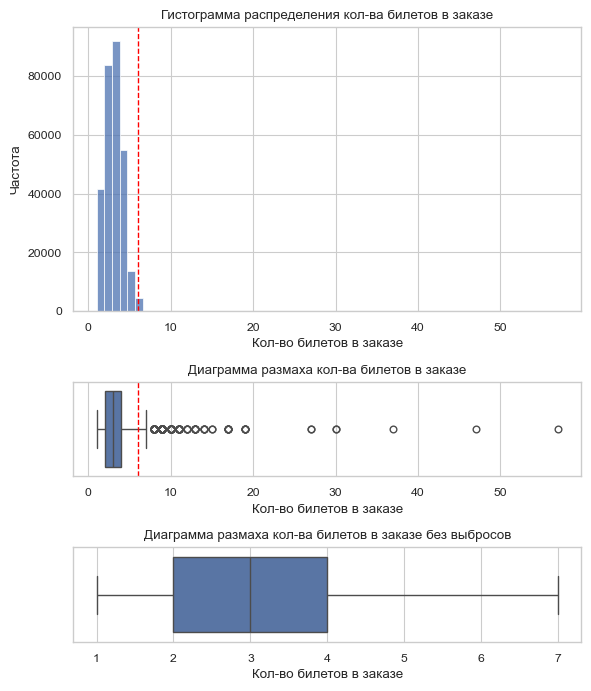

In [35]:
# Визуализация графиков для tickets_count
plot_hist_and_box(df, 'tickets_count', 'Кол-во билетов в заказе', 'кол-ва билетов в заказе', my_bins=60)

In [36]:
# Выведем статистические данные для tickets_count
df['tickets_count'].describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count    290230.000000
mean          2.755149
std           1.170634
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
99%           6.000000
max          57.000000
Name: tickets_count, dtype: float64

Сведения, представленные на гистограмме, показывают правое ассиметричное распределение. По графикам видно, что чаще всего люди покупают 2-4 билета за один заказ, а 99% всех исследуемых значений лежат в промежутке от 1 шт. до 6 шт. Максимум без учёта аномалий (конец правого «уса») принимает значение 7 шт, что может быть валидным в случае если пользователь бронирует стол в VIP-секторе на 5 и более персон или совершает заказ на большой круг друзей и знакомых. Значения превышающие 7 билетов в заказе нельзя считать типичными для среднестатистического пользователя, возможно они обусловлены тикет-ботами или спекулянтами. Ввиду этого в рамках дальнешего анализа считается целесообразной фильтрация заказов по значению 7 шт. в столбце  `tickets_count`.

In [37]:
# Оценим объем данных, которые хотим отфильтровать
print(f"Количество строк со значениями более 7 шт. в столбце 'tickets_count': {df.loc[df['tickets_count'] > 7].shape[0]}")
print(f"В относительном значении строки со значениями более 7 шт. в столбце 'tickets_count' составляют {round(df.loc[df['tickets_count'] > 7].shape[0] / df.shape[0] * 100, 2)}%")


Количество строк со значениями более 7 шт. в столбце 'tickets_count': 126
В относительном значении строки со значениями более 7 шт. в столбце 'tickets_count' составляют 0.04%


Доля строк с отрицательными значениями в столбце `tickets_count` менее 0.1% ввиду чего можно удалить их без значительного сокращения информативности датафрейма df.

In [38]:
# Отфильтруем данные по значению 7 шт. в столбце tickets_count
df = df.loc[df['tickets_count'] <= 7]

Визуализируем распределение значений столбца `days_since_prev` с помощью гистограммы и диаграммы размаха.

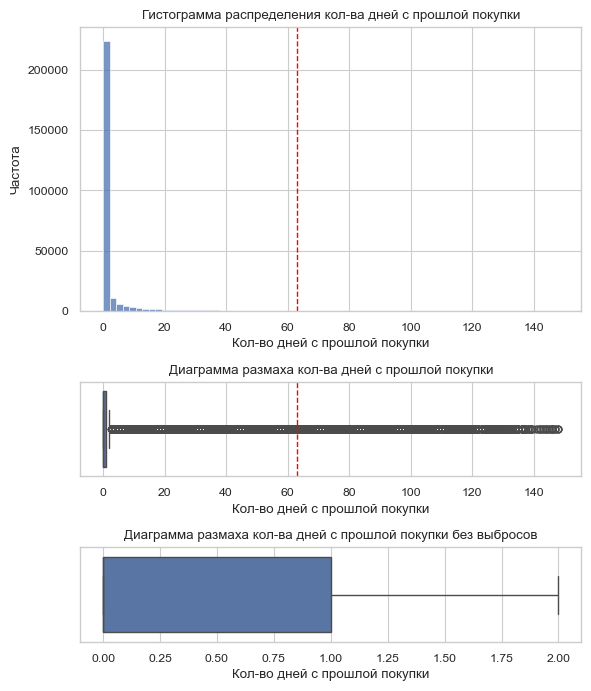

In [39]:
# Визуализация графиков для days_since_prev
plot_hist_and_box(df, 'days_since_prev', 'Кол-во дней с прошлой покупки', 'кол-ва дней с прошлой покупки')

In [40]:
# Выведем статистические данные для days_since_prev
df['days_since_prev'].describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count    268215.000000
mean          3.223735
std          11.353862
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
99%          63.000000
max         148.000000
Name: days_since_prev, dtype: float64

**Важно отметить**: гистограмма описывает исключительно лояльных пользователей, совершивших две и более покупки.

Сведения, представленные на гистограмме, показывают сильное правое ассиметричное распределение. По графикам видно, что множество лояльных пользователей, делают несколько заказов в день, ввиду чего медиана имеет близкое к нулю значение, а третий квартиль (75% значений) равен одному. 99-й процениль (99% значений) показывает, что несмотря на кажущееся множество значений за верхним порогом выбросов в основом с предыдущей покупки походит не более 63 дней.

Визуализируем распределение значений столбца `revenue_rub` с помощью гистограммы и диаграммы размаха.

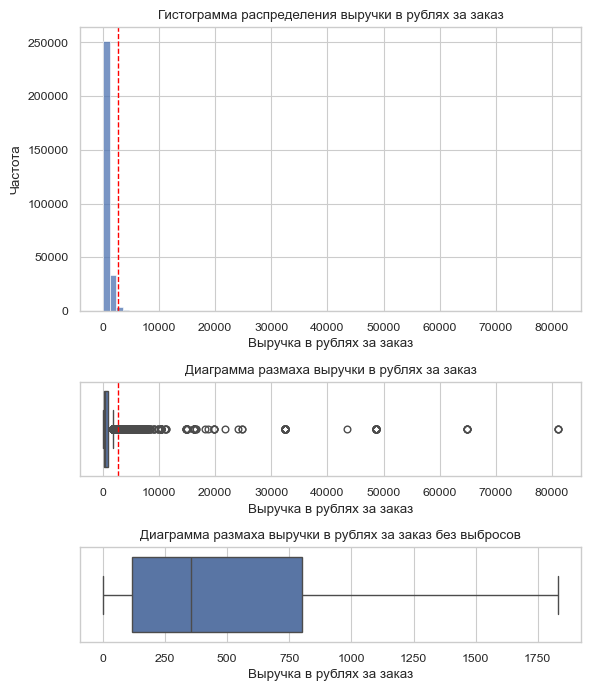

In [41]:
# Визуализация графиков для revenue_rub
plot_hist_and_box(df, 'revenue_rub', 'Выручка в рублях за заказ', 'выручки в рублях за заказ')

In [42]:
# Выведем статистические данные для revenue_rub
df['revenue_rub'].describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count    290104.000000
mean        556.065875
std         875.702626
min           0.000000
25%         114.610000
50%         352.030000
75%         802.250000
99%        2628.421739
max       81174.540000
Name: revenue_rub, dtype: float64

Сведения, представленные на гистограмме, показывают сильное правое ассиметричное распределение. По графикам видно, что типичное значение выручки за один заказ составляет примерно 350 руб. и колеблется в пределах от 114 руб. до 802 руб. Также стоит отметить, что несмотря на кажущееся большое количество выбросов, 99% значений выручки с заказа не превышают значения 2628.4 руб. и в дальшейшем в анализе мы будем учитывать исключительно заказы отфильтрованные по 99-у процентилю.

In [43]:
# Находим 99-й процентиль столбца revenue_rub
outliers = df['revenue_rub'].quantile(0.99)

# Отфильтруем данные по 99-у процентилю
df = df.loc[df['revenue_rub'] < outliers]

# Выведем информацию о датафрейме после всех преобразований
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287101 entries, 0 to 290610
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                287101 non-null  object        
 1   device_type_canonical  287101 non-null  category      
 2   order_id               287101 non-null  int32         
 3   order_dt               287101 non-null  datetime64[ns]
 4   order_ts               287101 non-null  datetime64[ns]
 5   currency_code          287101 non-null  category      
 6   revenue                287101 non-null  float64       
 7   tickets_count          287101 non-null  int8          
 8   days_since_prev        265422 non-null  float32       
 9   event_id               287101 non-null  int32         
 10  event_name             287101 non-null  object        
 11  event_type_main        287101 non-null  category      
 12  service_name           287101 non-null  object   

---
### Промежуточный вывод

В ходе предобработки данных были сделаны следующие шаги:

**Типы данных**
- Ввиду малости уникальных значений в столбцах  `device_type_canonical`, `currency_code` и `event_type_main` (менее сотой процента от всех строк датафрейма) данные в указанных столбцах для экономии памяти были преобразованы к типу `category`;
- Данные в целочисленных столбцах `order_id`, `tickets_count` и `event_id` были оптимизированы путем понижения разрядности:

In [44]:
for col in ['order_id', 'tickets_count', 'event_id']:
    print(f'Столбец {col} после оптимизации приведен к типу {df[col].dtype}')

Столбец order_id после оптимизации приведен к типу int32
Столбец tickets_count после оптимизации приведен к типу int8
Столбец event_id после оптимизации приведен к типу int32


- Данные, содержащие числа с плавающей точкой, в столбцах `revenue`, `days_since_prev` и `revenue_rub` были также оптимизированы путем понижения разрядности. При этом получилось понизить разрядность только столбца `days_since_prev`:

In [45]:
for col in ['revenue', 'days_since_prev', 'revenue_rub']:
    print(f'Столбец {col} после оптимизации приведен к типу {df[col].dtype}')

Столбец revenue после оптимизации приведен к типу float64
Столбец days_since_prev после оптимизации приведен к типу float32
Столбец revenue_rub после оптимизации приведен к типу float64


**Пропуски**: Пропуски в датафрейме `df` наблюдаются только в столбце `days_since_prev`, который отражает информацию о количестве дней от предыдущей покупки пользователя. Доля пропусков в указанном столбце составляет около 8%. Пропуски обусловлены спецификой столбца - для пользователей, совершивших одну покупку невозможно привести никакой информации.

In [46]:
print(f"Количество пропусков в абсолютном значении: {df.isna().sum().sum()}")
print(f"Количество пропусков в относительном значении: {round(df.isna().sum().sum() / df.size * 100, 2)}%")

Количество пропусков в абсолютном значении: 21679
Количество пропусков в относительном значении: 0.47%


**Дубликаты**: В процессе работы с датафреймом `df` явных и неявных дубликатов не было выявлено.

**Дополнительно**
- Выручка была приведена к единой валюте — российскому рублю. Для этого в датафрейм был добавлен столбец `revenue_rub`;
- Из датафрейма были исключены строки с отрицательными значениями в столбце `revenue_rub` ввиду их нерепрезентативности с точки зрения исследования вероятности возврата пользователя;
- Данные в датафрейме были отфильтрованы по 99-у процентилю столбца `revenue_rub` и по значению 7 шт. в столбце `tickets_count` для исключения из рассмотрения высоких значений выбросов.
- После всех преобразований размер датафрейма незначительно изменился:

In [47]:
print(f'Число строк исходного датафрейма: {raw_df.shape[0]}')
print(f'Число строк преобразованного датафрейма: {df.shape[0]}')
print(f'Из рассмотрения в абсолютном значении исключено {raw_df.shape[0] - df.shape[0]} строк')
print(f'В относительном значении было исключено {round((raw_df.shape[0] - df.shape[0]) / raw_df.shape[0] * 100, 2)}% строк')

Число строк исходного датафрейма: 290611
Число строк преобразованного датафрейма: 287101
Из рассмотрения в абсолютном значении исключено 3510 строк
В относительном значении было исключено 1.21% строк


- В ходе преобразований был уменьшен объем памяти, занимаемый df.

In [48]:
memory_usage_raw_df = raw_df.memory_usage(deep=True).sum() / (1024 ** 2)
memory_usage_df = df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f'Занимаемая память исходным датафреймом raw_df: {raw_df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} МБ.')
print(f'Занимаемая память преобразованным датафреймом df: {memory_usage_df:.2f} МБ.')
print(f'В абсолютном значении удалось уменьшить объем занимаемой памяти на {memory_usage_raw_df - memory_usage_df:.2f} МБ.')
print(f'В относительном значении удалось уменьшить объем занимаемой памяти на {(1 - memory_usage_df / memory_usage_raw_df):.2%}.')


Занимаемая память исходным датафреймом raw_df: 212.00 МБ.
Занимаемая память преобразованным датафреймом df: 154.58 МБ.
В абсолютном значении удалось уменьшить объем занимаемой памяти на 57.43 МБ.
В относительном значении удалось уменьшить объем занимаемой памяти на 27.09%.


[Назад к оглавлению](#toc)

<a id="создание-профиля-пользователя"></a>
## 3. Создание профиля пользователя

В будущем планируется создать модель для прогнозирования возврата пользователей. Поэтому на данном этапе необходимо собрать агрегированные признаки, описывающие поведение и профиль каждого пользователя.

<a id="построение-профиля-пользователя"></a>
### 3.1 Построение профиля пользователя

Построим профиль пользователя - для каждого пользователя найдем:
- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия;
- общее количество заказов;
- среднюю выручку с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

Для начала найдем общие агрегированные признаки и поместим их в датафрейм `users_portrait`. Далее добавим в профиль пользователя требуемые сведения о первом заказе: с помощью метода `merge` присоединеним необходимые столбцы из `df` по ключам `user_id` и `order_ts_min`.

In [49]:
# Отсортируем строки исходного датафрейма по времени
df = df.sort_values(by='order_ts')

# Найдем общие агрегированные признаки и поместим их в датафрейм users_portrait
users_portrait = df.groupby('user_id', as_index=False).agg({'order_ts': ['min', 'max'],
                                                            'order_id': 'count',
                                                            'revenue_rub': 'mean',
                                                            'tickets_count': 'mean',
                                                            'days_since_prev': 'mean'
                                                            })

# Переименуем столбцы в датафреме users_portrait для большей информативности   
users_portrait.columns = [
    'user_id',
    'order_dt_first',
    'order_dt_last',
    'total_orders',
    'revenue_rub_mean',
    'tickets_mean',
    'days_between_orders_mean'
]

# Добавим в агрегированные сведения о первом заказе
users_portrait = pd.merge(users_portrait,
                          df[['user_id', 'order_ts', 'device_type_canonical', 'region_name', 'service_name', 'event_type_main']],
                          left_on = ['user_id', 'order_dt_first'],
                          right_on = ['user_id', 'order_ts'],
                          how = 'left')

# Извлекаем дату в столбцах order_dt_min и order_dt_max
for col in ['order_dt_first', 'order_dt_last']:
    users_portrait[col] = users_portrait[col].dt.date
    users_portrait[col] = pd.to_datetime(users_portrait[col])

    
# Удалим лишнюю строку order_ts, появившуюся при присоединении
users_portrait = users_portrait.drop(columns=['order_ts'])

# Функция для отображения округленных числовых столбцов датафейма
def show_rounded_df(my_df, rows = 5):
    numeric_cols = my_df.select_dtypes(include='number').columns
    return my_df.head(rows).style.format({col: "{:.2f}" for col in numeric_cols})

# Выводим на экран парвые строки датафрема users_portrait
show_rounded_df(users_portrait)

,user_id,order_dt_first,order_dt_last,total_orders,revenue_rub_mean,tickets_mean,days_between_orders_mean,device_type_canonical,region_name,service_name,event_type_main
0,0002849b70a3ce2,2024-08-20 00:00:00,2024-08-20 00:00:00,1.00,1521.94,4.00,nan,mobile,каменевский регион,край билетов,театр
1,0005ca5e93f2cf4,2024-07-23 00:00:00,2024-10-06 00:00:00,2.00,774.01,3.00,75.00,mobile,каменевский регион,мой билет,выставки
2,000898990054619,2024-07-13 00:00:00,2024-10-23 00:00:00,3.00,767.21,2.67,51.00,mobile,североярская область,лови билет!,другое
3,00096d1f542ab2b,2024-08-15 00:00:00,2024-08-15 00:00:00,1.00,917.83,4.00,nan,desktop,каменевский регион,край билетов,театр
4,000a55a418c128c,2024-09-29 00:00:00,2024-10-15 00:00:00,2.00,61.31,1.50,16.00,mobile,поленовский край,лучшие билеты,театр


Теперь добавим два бинарных признака в датафрейм `users_portrait`:
- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

В случае, если столбец содержит 1 - истина, если 0 - ложь.

In [50]:
# Добавляем бинарные признаки
users_portrait['is_two'] = users_portrait['total_orders'] >= 2
users_portrait['is_five'] = users_portrait['total_orders'] >= 5

# Для удобства бинарные признаки приводим к 1 и 0
users_portrait[['is_two', 'is_five']] = users_portrait[['is_two', 'is_five']].astype('int8')

# Выводим на экран парвые строки датафрема users_portrait
show_rounded_df(users_portrait)

,user_id,order_dt_first,order_dt_last,total_orders,revenue_rub_mean,tickets_mean,days_between_orders_mean,device_type_canonical,region_name,service_name,event_type_main,is_two,is_five
0,0002849b70a3ce2,2024-08-20 00:00:00,2024-08-20 00:00:00,1.00,1521.94,4.00,nan,mobile,каменевский регион,край билетов,театр,0.00,0.00
1,0005ca5e93f2cf4,2024-07-23 00:00:00,2024-10-06 00:00:00,2.00,774.01,3.00,75.00,mobile,каменевский регион,мой билет,выставки,1.00,0.00
2,000898990054619,2024-07-13 00:00:00,2024-10-23 00:00:00,3.00,767.21,2.67,51.00,mobile,североярская область,лови билет!,другое,1.00,0.00
3,00096d1f542ab2b,2024-08-15 00:00:00,2024-08-15 00:00:00,1.00,917.83,4.00,nan,desktop,каменевский регион,край билетов,театр,0.00,0.00
4,000a55a418c128c,2024-09-29 00:00:00,2024-10-15 00:00:00,2.00,61.31,1.50,16.00,mobile,поленовский край,лучшие билеты,театр,1.00,0.00


In [51]:
# Выведем информацию о датафрейме users_portrait
users_portrait.info()

# Сохраним непредобработанную версию датафрейма 
raw_users_portrait = users_portrait.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21828 entries, 0 to 21827
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   user_id                   21828 non-null  object        
 1   order_dt_first            21828 non-null  datetime64[ns]
 2   order_dt_last             21828 non-null  datetime64[ns]
 3   total_orders              21828 non-null  int64         
 4   revenue_rub_mean          21828 non-null  float64       
 5   tickets_mean              21828 non-null  float64       
 6   days_between_orders_mean  13499 non-null  float32       
 7   device_type_canonical     21828 non-null  category      
 8   region_name               21828 non-null  object        
 9   service_name              21828 non-null  object        
 10  event_type_main           21828 non-null  category      
 11  is_two                    21828 non-null  int8          
 12  is_five           

[Назад к оглавлению](#toc)

<a id="оценка-репрезентативности-профиля-пользователя"></a>
### 3.2 Оценка репрезентативности профиля пользователя

Перед проведением исследовательского анализа данных важно понять насколько репрезентативны полученные данные и исследовать их на наличие аномалий. Для этого используя данные о профилях пользователей рассчитаем следующие показатели:
- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

In [52]:
# Вычислим требуемые показатели
def common_users_portrait_info():
    print(f'Общее число пользователей в выборке: {users_portrait['user_id'].count()}')
    print(f'Cредняя выручка с одного заказа: {round(users_portrait['revenue_rub_mean'].mean(), 2)}')
    print(f'Доля пользователей, совершивших 2 и более заказа: {round(users_portrait['is_two'].sum() / users_portrait['user_id'].count() * 100, 2)}%')
    print(f'Доля пользователей, совершивших 5 и более заказов: {round(users_portrait['is_five'].sum() / users_portrait['user_id'].count() * 100, 2)}%')
    
common_users_portrait_info()

Общее число пользователей в выборке: 21828
Cредняя выручка с одного заказа: 543.84
Доля пользователей, совершивших 2 и более заказа: 61.7%
Доля пользователей, совершивших 5 и более заказов: 28.99%


Также изучим статистические показатели:
- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

In [53]:
# Вычисляем статистические показатели 'total_orders', 'tickets_mean' и 'days_between_orders_mean'
users_portrait[['total_orders', 'tickets_mean', 'days_between_orders_mean']].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
total_orders,21828.0,13.152877,121.454346,1.0,1.0,2.00,5.000000,31.0,151.730000,10153.0
tickets_mean,21828.0,2.740788,0.904572,1.0,2.0,2.75,3.076923,4.0,5.000000,7.0
days_between_orders_mean,13499.0,15.868816,22.338312,0.0,1.0,8.00,20.428572,61.5,112.019997,148.0


Визуализируем распределения данных в столбцах `total_orders` и `tickets_mean` датафрейма `users_portrait`. Красной линией покажем 99-й процентиль т.е. границу, куда входит 99% значений столбца.

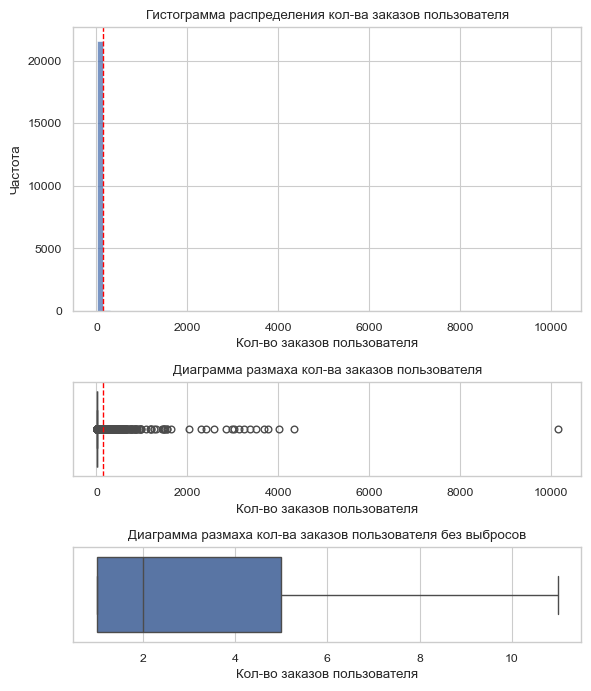

In [54]:
# Визуализация графиков для total_orders
plot_hist_and_box(users_portrait, 'total_orders', 'Кол-во заказов пользователя', 'кол-ва заказов пользователя')

Для дальнейшего анализа данных полезно будет отобразить продолжительность рассматриваемого периода. 

In [55]:
print(f'Продолжительность рассматриваемго периода: {users_portrait['order_dt_last'].max() - users_portrait['order_dt_first'].min()}')

Продолжительность рассматриваемго периода: 152 days 00:00:00


Распределение данных в столбце `total_orders`, предствленное на графиках, показывает наличие аномальных значений. В первую очередь стоит отметить, что максимальное значение указанного столбца составляет 10153 билетов за рассматриваемый период (152 дня), что не может быть реальным для обычного пользователя. На диаграмме размаха можем заметить, что такое высокое значение не единственное, существует достаточное количество 'пользователей' со значением в столбце `total_orders` более 500. Предположительно такие значения обусловлены тикет-ботами, скупающими некоторую долю билетов на мероприятия ежедневно или просто спекулянтами.

По этой причине можно сделать вывод, что фильтрация данных необходима. Рассмотрим возможность фильтрации по 99-у и 95-у процентилю:
- фильтрация данных **по 99-у процентилю (значение которого составляет 152) не считается валидной** т.к. в таком случае пользователь должен совершать заказ каждый день рассматриваемого периода, что не является типичным;
- фильтрация данных **по 95-у процентилю (значение которого составляет 31) считается рациональной**. В этом случае мы не исключим из рассмотрения наиболее лояльных пользователей, которые на регулярной основе пользуются сервисом, но при этом уберем из рассмотрения аномально высокие значения. При такой фильтрации темп совершения заказов лояльных клиентов  составит приблизительно 1 заказ в 5 дней, что кажется возможным для людей с активной жизненной позицией.

Проведем фильтрацию данных по 95-у процентилю `total_orders`.

In [56]:
# Найдем нужный процентиль
p95_orders = users_portrait['total_orders'].quantile(0.95)

In [57]:
# Создадим маску для фильтрации
mask = users_portrait['total_orders'] <= p95_orders

# Фильтрация данных по 95-у процентилю столбца total_orders
users_portrait = users_portrait.loc[mask]

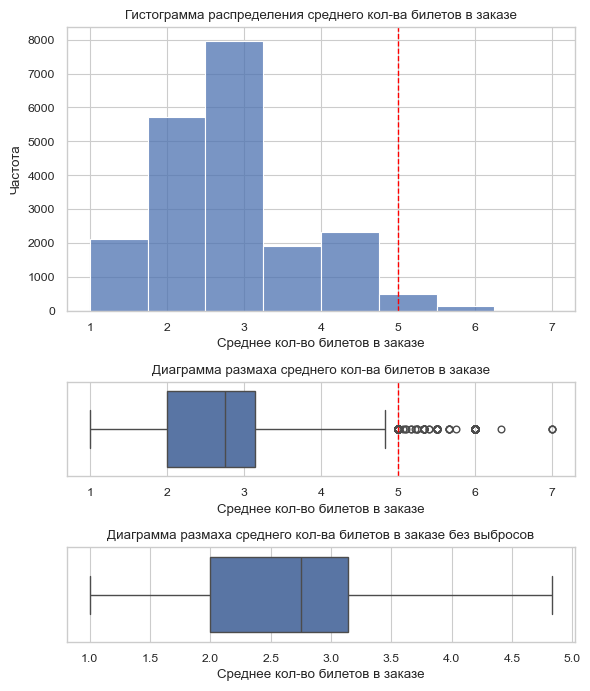

In [58]:
# Визуализация графиков для tickets_mean
plot_hist_and_box(users_portrait, 'tickets_mean', 'Среднее кол-во билетов в заказе', 'среднего кол-ва билетов в заказе', my_bins=8)

Распределение данных в столбце `tickets_mean`, предствленное на графиках, показывает распределение близкое к нормальному. Как было отмечено ранее покупка более 5-и билетов может быть обусловлена или брони столов в VIP секторе на 5 и более персон или заказами билетов на большие компании друзей и знакомых. Считается целесообразным **не фильтровать датафрейм по значениям или процентилям указанного столбца**.

In [59]:
# Выведем информацию о преобразованном users_portrait
users_portrait.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20738 entries, 0 to 21827
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   user_id                   20738 non-null  object        
 1   order_dt_first            20738 non-null  datetime64[ns]
 2   order_dt_last             20738 non-null  datetime64[ns]
 3   total_orders              20738 non-null  int64         
 4   revenue_rub_mean          20738 non-null  float64       
 5   tickets_mean              20738 non-null  float64       
 6   days_between_orders_mean  12409 non-null  float32       
 7   device_type_canonical     20738 non-null  category      
 8   region_name               20738 non-null  object        
 9   service_name              20738 non-null  object        
 10  event_type_main           20738 non-null  category      
 11  is_two                    20738 non-null  int8          
 12  is_five                

Оценим объем отфильтрованных данных в сравнении с исходным датафреймом.

In [60]:
print(f'Число строк исходного датафрейма: {raw_users_portrait.shape[0]}')
print(f'Число строк преобразованного датафрейма: {users_portrait.shape[0]}')
print(f'Из рассмотрения в абсолютном значении исключено {raw_users_portrait.shape[0] - users_portrait.shape[0]} строк')
print(f'В относительном значении было исключено {round((raw_users_portrait.shape[0] - users_portrait.shape[0]) / raw_users_portrait.shape[0] * 100, 2)}% строк')

Число строк исходного датафрейма: 21828
Число строк преобразованного датафрейма: 20738
Из рассмотрения в абсолютном значении исключено 1090 строк
В относительном значении было исключено 4.99% строк


---
### Промежуточный вывод

В ходе создания провилей пользователей были сделаны следующие шаги:
- для каждого пользователя были собраны и записаны в датафрейм `user_portrait` агрегированные признаки, описывающие поведение и профиль каждого пользователя. Указанный датафрейм содержит следующие столбцы:
    - `user_id` - уникальный идентификатор пользователя;
    - `order_dt_first` - дата первого заказа;
    - `order_dt_last` - дата последнего заказа;
    - `total_orders` - общее количество заказов;
    - `revenue_rub_mean` - средняя выручка с одного заказа в рублях;
    - `tickets_mean` - среднее количество билетов в заказе;
    - `days_between_orders_mean` -  среднее количество дней между заказами;
    - `device_type_canonical` - устройство, с которого был сделан первый заказ;
    - `region_name` - регион проведения первого мероприятия;
    - `service_name` - билетный партнёр, к которому обращались при первом заказе;
    - `event_type_main` - жанр первого посещённого мероприятия;
    - `is_two` - бинарный признак совершил ли пользователь 2 и более заказа;
    - `is_five` - бинарный признак совершил ли пользователь 5 и более заказов;

- Проведена оценка репрезентативности полученых данных, в рамках которой были изучены статистические показатели столбцов `total_orders`, `tickets_mean` и `days_between_orders_mean`. При анализе статистических данных столбца `total_orders` были выявлены аномальные значения, ввиду чего было принято решение отфильтровать данные по 95-у процентилю `total_orders`.

- Проведена оценка объема данных, оставшихся после фильтрации. В абсолютном значении из датафрейма было исключено 1090 строк, что в относительном значении составляет приблизительно 5%. Таким образом количество пользователей для ислледовательского анализа данных составляет 20738 шт.

[Назад к оглавлению](#toc)

<a id="исследовательский-анализ-данных"></a>
## 4. Исследовательский анализ данных

В данном разделе проведем исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого будем использовать составленные ранее профили пользователей из датафрейма `user_portrait`.

<a id="исследование-признаков-первого-заказа-и-их-связи-с-возвращением-на-платформу"></a>
### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуем признаки, описывающие первый заказ пользователя и выясним, влияют ли они на вероятность возвращения пользователя.

<a id="изучение-распределения-пользователей-по-признакам"></a>
#### 4.1.1. Изучение распределения пользователей по признакам

Подсчитаем общее количество пользователей в каждом сегменте и их долю в разрезе следующих признаков:
- по типу их первого мероприятия;
- по типу устройства, с которого совершена первая покупка;
- по региону проведения мероприятия из первого заказа;
- по билетному оператору, продавшему билеты на первый заказ.

In [61]:
# Создадим функцию для подсчета кол-ва пользователей в каждом сегменте в абсолютных и относительных значениях.
def count_users_in_segment(my_df, column_name, formating=True):
    category_count = my_df[column_name].value_counts().reset_index()
    category_count['share'] = category_count['count'] / category_count['count'].sum()
    category_count = category_count.rename(columns = {'count': 'total_users'})
    if formating:
        return category_count.style.format({'share': '{:.1%}'}).background_gradient(cmap='Blues')
    else:
        return category_count

In [62]:
# Распределение по типу их первого мероприятия
count_users_in_segment(users_portrait, 'event_type_main')

,event_type_main,total_users,share
0,концерты,9183,44.3%
1,другое,5153,24.8%
2,театр,4072,19.6%
3,стендап,1070,5.2%
4,спорт,765,3.7%
5,выставки,401,1.9%
6,ёлки,94,0.5%


In [63]:
# Распределение по типу устройства, с которого совершена первая покупка
count_users_in_segment(users_portrait, 'device_type_canonical')

,device_type_canonical,total_users,share
0,mobile,17204,83.0%
1,desktop,3534,17.0%


In [64]:
# Распределение по региону проведения мероприятия из первого заказа
count_users_in_segment(users_portrait, 'region_name')

,region_name,total_users,share
0,каменевский регион,6783,32.7%
1,североярская область,3598,17.3%
2,широковская область,1184,5.7%
3,озернинский край,660,3.2%
4,малиновоярский округ,516,2.5%
5,травяная область,469,2.3%
6,шанырский регион,463,2.2%
7,светополянский округ,436,2.1%
8,речиновская область,421,2.0%
9,яблоневская область,399,1.9%


In [65]:
# Распределение по билетному оператору, продавшему билеты на первый заказ
count_users_in_segment(users_portrait, 'service_name')

,service_name,total_users,share
0,билеты без проблем,4955,23.9%
1,мой билет,2842,13.7%
2,лови билет!,2708,13.1%
3,билеты в руки,2423,11.7%
4,облачко,2110,10.2%
5,весь в билетах,1234,6.0%
6,лучшие билеты,1130,5.4%
7,прачечная,550,2.7%
8,край билетов,438,2.1%
9,дом культуры,340,1.6%


Изучая полученные данные по пользователям в разрезе каждого признака можно отметить значительную неравномерность распределения, а именно:
- **тип первого мероприятия**: наибольшая доля пользователй находится в сегментах 'концерты' (44.3%), 'другое' (24.8%) и 'театр' (19.6%) (эти сегменты являются "точками входа"). В остальных четырех сегментах доля составляет не более 6%.
- **тип устройства, с которого совершена первая покупка**: сегмент 'mobile' (83%) значительно преобладает над сементом 'desktop', для которого доля пользователей составляет оставшиеся 17%. В рассматриваемом разрезе сегмент 'mobile' является "точкой входа";
- **регион проведения мероприятия из первого заказа**: значительная доля пользователей сосредоточена в двух сегментах (32.7% и 17.3% соответственно), еще 7 сегментов занимают доли в пределах от 6% до 2%, а на остальные 72 региона приходится менее 2% пользователей. "Точками входа" являются условные регионы 'каменевский регион' и 'североярская область';	
- **билетный оператор, продавший билеты на первый заказ**: наблюдается значительное количество операторов (34 шт.) при этом в наибольшая доля пользователей у пяти сегментов 'билеты без проблем' (23.9%), 'мой билет' (13.7%), 'лови билет' (13.1%), 'билеты в руки' (11.7%) и 'облачко' (10.2%) (эти сегменты являются "точками входа"). Еще четыре оператора занимают долю от 2 до 6%, а доля остальных 25-и операторов менее 2%.

[Назад к оглавлению](#toc)

<a id="анализ-возвратов-пользователей"></a>
#### 4.1.2. Анализ возвратов пользователей

Для каждого сегмента вычислим долю пользователей, совершивших два и более заказа и визуализируем результаты.

In [66]:
# Создадим функцию для подсчета доли пользователей, совершивших два и более заказа.
def share_loyal_users(my_df, col, formating=True):
    share_loyal = my_df.groupby(col, observed=False).agg({'user_id': 'count', 'is_two': 'sum'}).reset_index()
    share_loyal.columns = [col, 'total_users', 'is_two']
    share_loyal['share_is_two'] = share_loyal['is_two'] / share_loyal['total_users']
    share_loyal = share_loyal.sort_values(by='total_users', ascending=False)
    if formating:
        return share_loyal.style.format({'share_is_two': '{:.1%}'}).background_gradient(cmap='Blues')
    else:
        share_loyal = share_loyal.sort_values(by='total_users', ascending=False)
        return share_loyal
    
# Создадим функцию для построения графика
def create_barplot(my_df, x_val, y_val, title, x_label, orient_type='x'):
    if orient_type == 'x':
        sns.barplot(my_df, x=x_val, y=y_val, order=my_df[x_val], orient = orient_type)
        plt.title(f"Доля пользователей, совершивших 2 и более заказов \n в разрезе {title}")
        plt.xlabel(x_label)
        plt.ylabel("Доля пользователей")
        plt.show()
    else:
        sns.barplot(my_df, x=y_val, y=x_val, order=my_df[x_val], orient = orient_type)
        plt.title(f"Доля пользователей, совершивших 2 и более заказов \n в разрезе {title}")
        plt.xlabel("Доля пользователей")
        plt.ylabel(x_label)
        plt.show()

In [67]:
# Доля пользователей с 2-мя и более покупками по типу их первого мероприятия
display(share_loyal_users(users_portrait, 'event_type_main'))

,event_type_main,total_users,is_two,share_is_two
2,концерты,9183,5534,60.3%
1,другое,5153,2969,57.6%
5,театр,4072,2520,61.9%
4,стендап,1070,636,59.4%
3,спорт,765,414,54.1%
0,выставки,401,253,63.1%
6,ёлки,94,52,55.3%


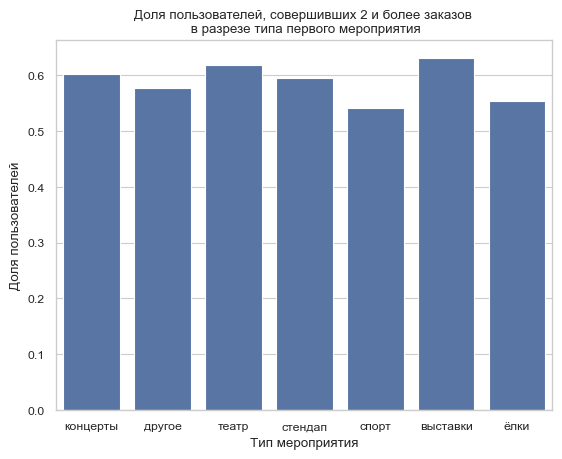

In [68]:
# Для построения графика запомним датафрейм
loyal_per_event = share_loyal_users(users_portrait, 'event_type_main', formating=False)

# Визуализируем распределение 
create_barplot(loyal_per_event, 'event_type_main', 'share_is_two', 'типа первого мероприятия', 'Tип мероприятия')

**Вывод**: Распределение доли пользователей, совершивших 2 и более заказов в разрезе типа первого мероприятия, варьируется в пределах от 54.1 до 63.1%. При этом доля пользователей, совершивших 2 и более заказов для сегментов 'выставки' (63.1%), 'театр' (61.9%) и 'концерты' (60.3%) наибольшая среди прочих, ввиду чего можно отнести эти сегменты к успешным точкам входа. Стоит отметить, что несмотря на то, что сегмент 'выставки' со значением 63.1% лидирует, на него в общем приходится менее 2% всех юзеров.

In [69]:
# Доля пользователей с 2-мя и более покупками по типу устройства, с которого совершена первая покупка
share_loyal_users(users_portrait, 'device_type_canonical')

,device_type_canonical,total_users,is_two,share_is_two
1,mobile,17204,10183,59.2%
0,desktop,3534,2195,62.1%


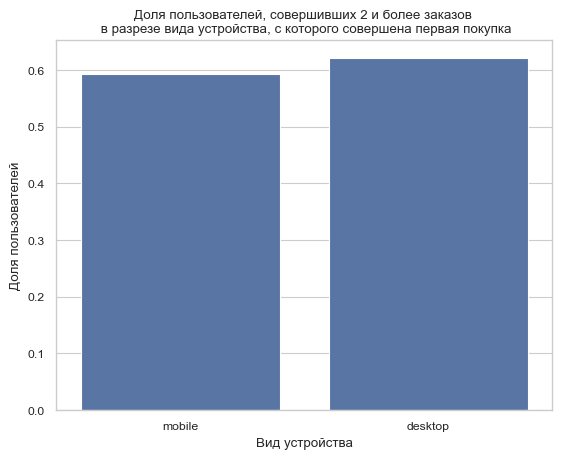

In [70]:
# Для построения графика запомним датафрейм
loyal_per_device = share_loyal_users(users_portrait, 'device_type_canonical', formating=False)

# Визуализируем распределение 
create_barplot(loyal_per_device,
               'device_type_canonical',
               'share_is_two',
               'вида устройства, с которого совершена первая покупка',
               'Вид устройства')

**Вывод**: Доля пользователей, совершивших 2 и более заказов в разрезе устройства, с которого совершена первая покупка, распределена практически поровну (для сегментов 'desktop' и 'mobile' 59.2% до 62.1% соответственно). Ярко выраженной "успешной точки входа" не выявлено, но для первого заказа с декстопных устройств процент на 2.9% выше хотя в общем на него приходится только 17% пользователей.

In [71]:
# Доля пользователей с 2-мя и более покупками по региону проведения мероприятия из первого заказа
share_loyal_users(users_portrait, 'region_name')

,region_name,total_users,is_two,share_is_two
23,каменевский регион,6783,4118,60.7%
60,североярская область,3598,2234,62.1%
77,широковская область,1184,749,63.3%
45,озернинский край,660,358,54.2%
41,малиновоярский округ,516,284,55.0%
74,травяная область,469,281,59.9%
76,шанырский регион,463,299,64.6%
57,светополянский округ,436,279,64.0%
52,речиновская область,421,260,61.8%
78,яблоневская область,399,232,58.1%


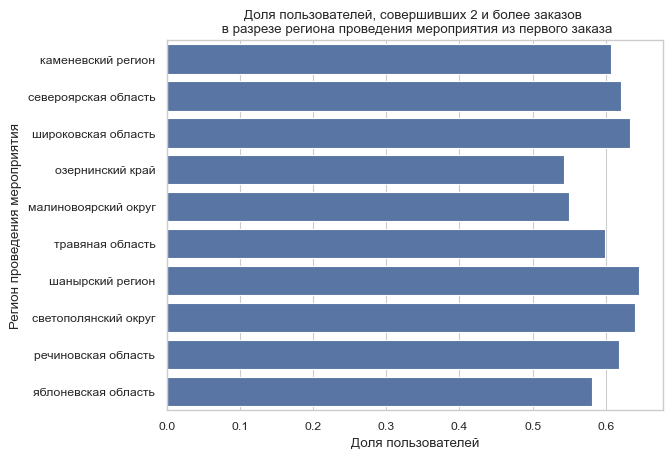

In [72]:
# Для построения графика запомним датафрейм 
loyal_per_region = share_loyal_users(users_portrait, 'region_name', formating=False)

# Визуализируем распределение, ограничившись 10 сегментами с наибольшим кол-вом пользователей
create_barplot(loyal_per_region.head(10),
               'region_name',
               'share_is_two',
               'региона проведения мероприятия из первого заказа',
               'Регион проведения мероприятия',
                orient_type="y")

**Вывод**: Распределение доли пользователей, совершивших 2 и более заказов в разрезе региона проведения мероприятия (среди 10-и наиболее популярных), варьюруется в пределах от 54.2 до 64.6%. Успешными точками входа являются регионы 'шанырский регион' (64.6%), 'светополянский округ' (64.0%), 'широковская область' (63.2%) и 'светоярская область' (62.1%). При этом 'светоярская область' и 'широковская область' занимают 2-е и 3-е места по общему количеству пользователей.

In [73]:
# Доля пользователей с 2-мя и более покупками по билетному оператору, продавшему билеты на первый заказ
share_loyal_users(users_portrait, 'service_name')

,service_name,total_users,is_two,share_is_two
3,билеты без проблем,4955,2907,58.7%
22,мой билет,2842,1681,59.1%
19,лови билет!,2708,1610,59.5%
4,билеты в руки,2423,1471,60.7%
23,облачко,2110,1266,60.0%
7,весь в билетах,1234,757,61.3%
20,лучшие билеты,1130,673,59.6%
24,прачечная,550,332,60.4%
17,край билетов,438,280,63.9%
12,дом культуры,340,214,62.9%


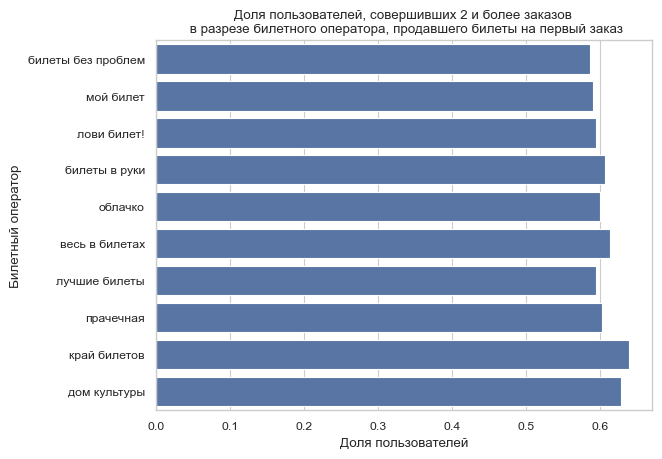

In [74]:
# Для построения графика запомним датафрейм 
loyal_per_service = share_loyal_users(users_portrait, 'service_name', formating=False)

# Визуализируем распределение, ограничившись 10 сегментами с наибольшим кол-вом пользователей
create_barplot(loyal_per_service.head(10),
               'service_name',
               'share_is_two',
               'билетного оператора, продавшего билеты на первый заказ',
               'Билетный оператор',
                orient_type="y")

**Вывод**: Распределение доли пользователей, совершивших 2 и более заказов в разрезе билетного оператора, продавшему билеты на первый заказ (среди 10-и наиболее популярных), варьюруется в пределах от 58.7 до 63.9%. При этом наибольшая доля вернувшихся пользователей у операторов 'край билетов' (63.9%) и 'дом культуры' (62.9%) (успешные точки входа), хотя они и занимают 9-е и 10-е места по общему количеству пользователей.

[Назад к оглавлению](#toc)

<a id="проверка-продуктовых-гипотез"></a>
#### 4.1.3. Проверка продуктовых гипотез

Проверим следующие продуктовые гипотезы:
- **Гипотеза 1**: Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2**: В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

**Проверим первую продуктовую гипотезу**. Для этого выведем долю пользователей с двумя и более заказами на спортивные мероприятия и аналогичную долю для сегмента 'концерты'.

In [75]:
print(f'Доля пользователей с двумя и более заказами на спортивные мероприятия: {round(loyal_per_event.loc[loyal_per_event['event_type_main'] == 'спорт', 'share_is_two'].iloc[0],2)}')
print(f'Доля пользователей с двумя и более заказами на концерты: {round(loyal_per_event.loc[loyal_per_event['event_type_main'] == 'концерты', 'share_is_two'].iloc[0],2)}')

Доля пользователей с двумя и более заказами на спортивные мероприятия: 0.54
Доля пользователей с двумя и более заказами на концерты: 0.6


Тип мероприятия действительно влияет на вероятность возврата на Яндекс Афишу, однако  пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ реже, чем пользователи, оформившие свой первый заказ на концерты. Поэтому **гипотеза 1 не верна**.

**Проверим вторую продуктовую гипотезу**. Для этого выведем количество всех пользователей по десяти полулярным регионам (где доли стабильны) и долю пользователей с двумя и более заказами в разрезе регионов.

In [76]:
loyal_per_region.head(10).style.format({'share_is_two': '{:.1%}'}).background_gradient(cmap='Blues')

,region_name,total_users,is_two,share_is_two
23,каменевский регион,6783,4118,60.7%
60,североярская область,3598,2234,62.1%
77,широковская область,1184,749,63.3%
45,озернинский край,660,358,54.2%
41,малиновоярский округ,516,284,55.0%
74,травяная область,469,281,59.9%
76,шанырский регион,463,299,64.6%
57,светополянский округ,436,279,64.0%
52,речиновская область,421,260,61.8%
78,яблоневская область,399,232,58.1%


Из результатов видно, что наибольшие доли пользователей с двумя и более заказами имеют сегменты с 7-м и 8-м места по количеству пользователей, ввиду чего **гипотеза 2 не верна**.

[Назад к оглавлению](#toc)

<a id="исследование-поведения-пользователей-через-показатели-выручки-и-состава-заказа"></a>
### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучим количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.Такие метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

<a id="исследование-связи-между-средней-выручкой-сервиса-с-заказа-и-повторными-заказами"></a>
#### 4.2.1. Исследование связи между средней выручкой сервиса с заказа и повторными заказами

Проследим связь между средней выручкой сервиса с заказа и повторными заказами. Для этого построим сравнительную гистограмму распределения средней выручки с заказа:
- для пользователей, совершивших один заказ;
- для вернувшихся пользователей, совершивших 2 и более заказа.


In [77]:
# Функция для построения гистограммы распределения средней выручки по группам
def create_hist_revenue(my_df, col, my_hue):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=my_df,
                 x=col,
                 hue=my_hue,
                 stat='density',
                 bins=70,
                 kde=True)
    # Настраиваем подписи
    plt.title("Распределение средней выручки с заказа для категорий пользователей по кол-ву заказов")
    plt.xlabel("Средняя выручка")
    plt.ylabel("Доля вхождений")
    plt.show()

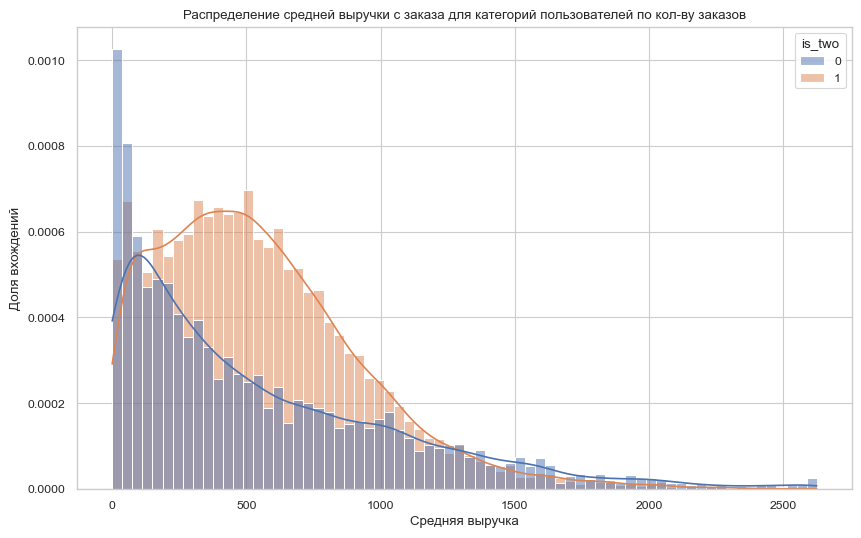

In [78]:
# Строим гистограмму распределения средней выручки с билета
create_hist_revenue(users_portrait, 'revenue_rub_mean', 'is_two')

In [79]:
# Статистические данные о пользователях с одной покупкой
users_portrait.loc[users_portrait['is_two'] == 0]['revenue_rub_mean'].describe()

count    8360.000000
mean      544.481574
std       517.111152
min         0.000000
25%       133.005000
50%       378.030000
75%       827.675000
max      2624.814609
Name: revenue_rub_mean, dtype: float64

In [80]:
# Статистические данные о пользователях с двумя и более покупками
users_portrait.loc[users_portrait['is_two'] == 1]['revenue_rub_mean'].describe()

count    12378.000000
mean       547.256615
std        377.268505
min          0.000000
25%        261.389554
50%        494.470625
75%        761.450184
max       2624.814609
Name: revenue_rub_mean, dtype: float64

По данным из графика отметим следующие моменты:
- для пользователей с одним заказом (`is_two` = 0) значения средней выручки с заказа распределены с правой ассиметрией и в основном сконцентрированы в промежутке от 0 до 100. Причем значительная часть данных имеет близкие к нулю значения;
- для пользователей более чем с двумя заказами (`is_two` = 1) значения средней выручки также распределены с правой ассиметрией, но в меньшей степени (ближе к симметричному), а значения в основном сконцентрированы в промежутке от 0 до 700;
- основное различие между группами заключается в том, что для пользователей с одной покупкой характерна низкая стоимость заказа, а по мере ее увеличения снижается и доля пользователей. Для пользователей более чем с двумя заказами, в свою очередь, максимум концентрации наблюдается при стоимости заказа в промежутке от от 500-600 руб, хотя также есть значительная доля 'бесплатных' заказов.

[Назад к оглавлению](#toc)

<a id="cравнение-распределения-по-средней-выручке-с-заказа-в-выделенных-группах-пользователей"></a>
#### 4.2.2. Сравнение распределения по средней выручке с заказа в выделенных группах пользователей

Сравним распределение по средней выручке с заказа в двух группах пользователей:
- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

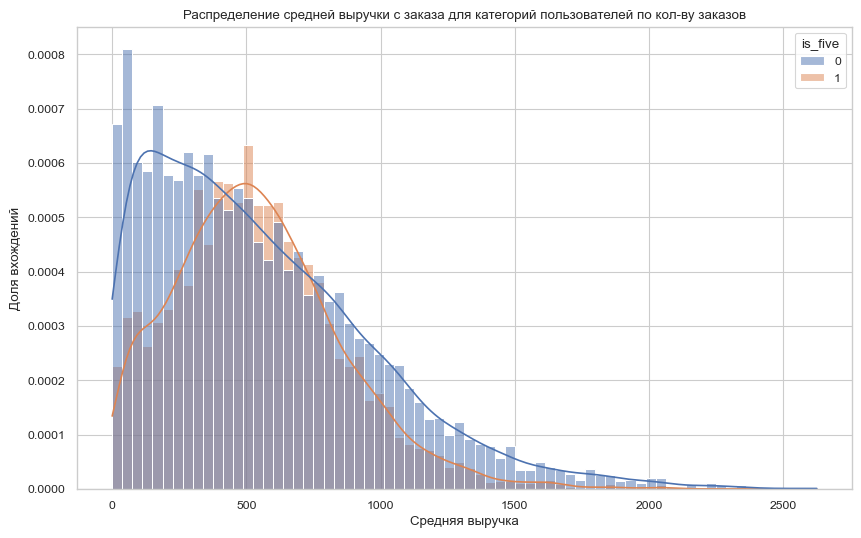

In [81]:
# Выделем только лояльных пользователей в отдельный датафрейм
loyal_users = users_portrait[['revenue_rub_mean', 'is_two', 'is_five']].copy()
# Уберем нелояльных пользователей
loyal_users = loyal_users.loc[loyal_users['is_two'] != 0]

# Строим гистограмму распределения средней выручки с заказа для лояльных пользователей
create_hist_revenue(loyal_users, 'revenue_rub_mean', 'is_five')

In [82]:
# Статистические данные о пользователях с 2-4 покупками
loyal_users.loc[loyal_users['is_five'] == 0]['revenue_rub_mean'].describe()

count    7139.000000
mean      551.458537
std       418.728003
min         0.000000
25%       219.441667
50%       472.105000
75%       798.550000
max      2624.814609
Name: revenue_rub_mean, dtype: float64

In [83]:
# Статистические данные о пользователях с 5 и более покупками
loyal_users.loc[loyal_users['is_five'] == 1]['revenue_rub_mean'].describe()

count    5239.000000
mean      541.530805
std       311.976638
min         0.000000
25%       316.948333
50%       514.308000
75%       727.250545
max      2071.622857
Name: revenue_rub_mean, dtype: float64

Несмотря на то, что значения средней выручки для двух групп пользователей сопоставимы (551.4 руб для пользователй с 2-4 заказами и 541.5 руб. для пользователей более чем с 5 заказами) можно увидеть, что пользователи с 5 и более заказами чаще совершают покупки более дорогих билетов. Для таких пользователей медианное значение стоимости заказа составляет 514.3 руб., а стандартное отклонение 311.9 руб., в то время как для пользователй с 2-4 заказами медианное значение - 472.1 руб, а стандартное отклонение 418.7 руб.

[Назад к оглавлению](#toc)

<a id="анализ-влияния-среднего-количества-билетов-в-заказе-на-вероятность-повторной-покупки"></a>
#### 4.2.3. Анализ влияния среднего количества билетов в заказе на вероятность повторной покупки

Визуализирем распределение пользователей по среднему количеству билетов в заказе. 

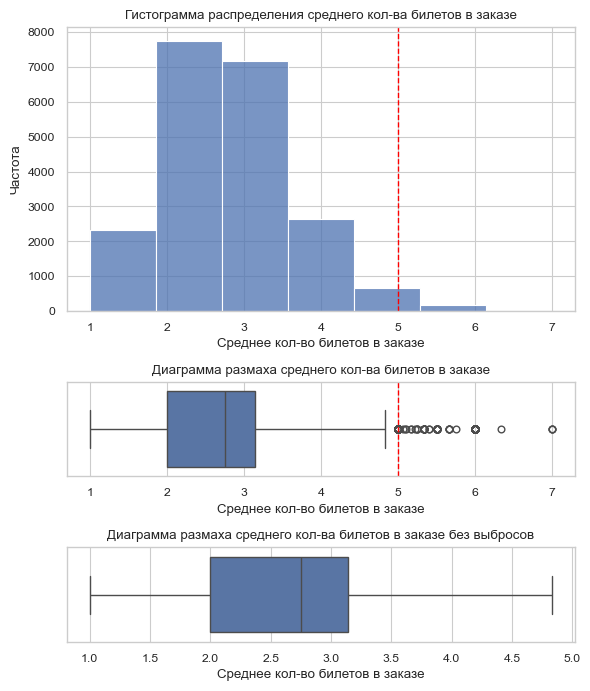

In [84]:
# Визуализация графиков для tickets_mean
plot_hist_and_box(users_portrait, 'tickets_mean', 'Среднее кол-во билетов в заказе', 'среднего кол-ва билетов в заказе', my_bins=7)

In [85]:
# Вычисляем статистические показатели 'total_orders', 'tickets_mean' и 'days_between_orders_mean'
users_portrait['tickets_mean'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count    20738.000000
mean         2.741295
std          0.925892
min          1.000000
25%          2.000000
50%          2.750000
75%          3.142857
95%          4.000000
99%          5.000000
max          7.000000
Name: tickets_mean, dtype: float64

Распределение данных в столбце `tickets_mean`, предствленное на графиках, показывает, что в основном среднее количество билетов составляет 2-3 шт. Стандартное отклонение составляет 0.93, что говорит о достаточно высокой концентрации значений в пределах медианы, а распределение близко по форме к нормальному.

Теперь разделим пользователей на несколько сегментов по среднему количеству билетов в заказе:
- от 1 до 2 билетов;
- от 2 до 3 билетов;
- от 3 до 5 билетов;
- от 5 и более билетов.

Для каждого сегмента подсчитаем общее число пользователей и долю пользователей, совершивших повторные заказы.

In [86]:
# Разделим пользователей на сегменты по среднему количеству билетов в заказе
users_portrait['ticket_group'] = pd.cut(users_portrait['tickets_mean'],
                                        bins = [0, 2, 3, 5, 12],
                                        labels = ['от 1 до 2 билетов', 'от 2 до 3 билетов', 'от 3 до 5 билетов', 'от 5 и более билетов'])

# Расчитаем для каждого сегмента количество пользователей
ticket_group = users_portrait.groupby('ticket_group', observed=False).agg({'user_id': 'count', 'is_two': 'mean'})

# Переименуем столбцы
ticket_group.columns = ['total_users', 'share_is_two']

# Выводим результат
ticket_group.style.format({'share_is_two': '{:.1%}'}).background_gradient(cmap='Blues')

,total_users,share_is_two
ticket_group,,
от 1 до 2 билетов,6150,40.1%
от 2 до 3 билетов,9168,72.2%
от 3 до 5 билетов,5237,61.9%
от 5 и более билетов,183,30.6%


По полученным данным можно отметить следующее:
- пользователи распределены по сегментам неравномерно. Для сегмента 'от 2 до 3 билетов' общее количество пользователей наибольшая. Также для данного сегмента наибольшая доля пользователей, совершивших повторный заказ составляет более 70%;
- сегмент 'от 5 и более билетов' самый малочисленный и пользователи с наименьшей вероятностью совершают повторную покупку (30.6%) в сравнении с другими сегментами;
- более половины всех пользователей сегментов 'от 2 до 3 билетов' и 'от 3 до 5 билетов' совершают повторную покупку, в то время как доля совершивших повторных заказ для групп от '1 до 2 билетов' и 'от 5 и более билетов' составляет 40.1% и 30.6% соответственно;
- Аномально высоких или низких значений доли пользователей, совершивших повторную покупку не наблюдается. Чаще всего мероприятия посещяются 2-3 людьми (т.е. приобретается 2-3 билета), ввиду чего и вероятность сделать подобный заказ выше. Собрать 5 и более людей для посещения мероприятия скорее является единичным случаем для определенного концерта, подобный повторный заказ маловероятен.

[Назад к оглавлению](#toc)

<a id="исследование-временных-характеристик-первого-заказа-и-их-влияния-на-повторные-покупки"></a>
### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучим временные параметры, связанные с первым заказом пользователей:
- день недели первой покупки;
- средний интервал между покупками пользователей с повторными заказами.

<a id="анализ-влияния-дня-недели-в-который-была-совершена-первая-покупка-на-поведение-пользователей"></a>
#### 4.3.1. Анализ влияния дня недели, в который была совершена первая покупка на поведение пользователей

Изучим временной параметр, связанный с первым заказом пользователей в зависимости от дня недели первой покупки.

In [87]:
# Создадим словарь со значениями day_of_week соответствующим названиям дней недели
name_of_week_day = {0: 'понедельник',
                    1: 'вторник',
                    2: 'среда',
                    3: 'четверг',
                    4: 'пятница',
                    5: 'суббота',
                    6: 'воскресенье'}

# Вытаскиваем номер дня недели
users_portrait['week_day'] = users_portrait['order_dt_first'].dt.day_of_week
# Заменяем номера на названия дней недели
users_portrait['week_day'] = users_portrait['week_day'].map(name_of_week_day)

# Задаём нужный порядок дней недели
day_order = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']

# Преобразуем столбец week_day в категориальный тип с нужным порядком
users_portrait['week_day'] = pd.Categorical(users_portrait['week_day'], categories=day_order, ordered=True)

# Группируем заказы по дням недели первой покупки 
week_day_group = users_portrait.groupby('week_day', observed=False).agg({'user_id': 'count', 'is_two': 'mean'})

# Переименуем столбцы
week_day_group.columns = ['total_users', 'share_is_two']

# Визуализируем
week_day_group.style.format({'share_is_two': '{:.1%}'}).background_gradient(cmap='Blues')

,total_users,share_is_two
week_day,,
понедельник,2813,61.6%
вторник,3015,60.0%
среда,2961,61.0%
четверг,3027,58.3%
пятница,3163,58.6%
суббота,3120,60.4%
воскресенье,2639,58.0%


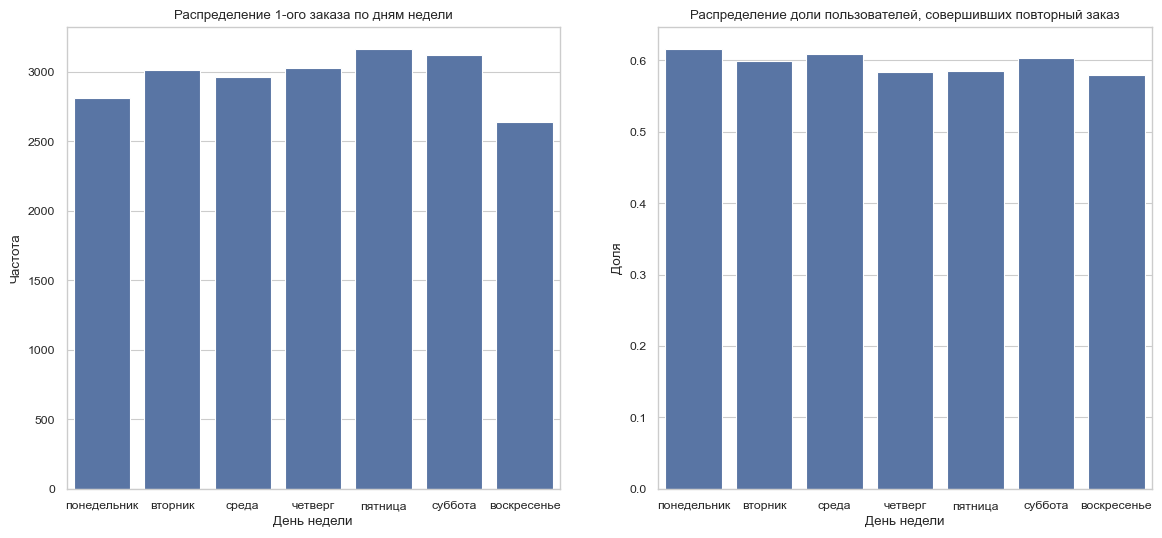

In [88]:
# Создаём фигуру
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Левый график: частота первых заказов
sns.countplot(data=users_portrait, x='week_day', order=day_order, ax=axes[0])
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение 1-ого заказа по дням недели')
axes[0].tick_params(axis='x')  # чтобы подписи не налезали

# Правый график: доля повторных заказов
sns.barplot(data=users_portrait, x='week_day', y='is_two', order=day_order, ax=axes[1], errorbar=None)
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('Доля')
axes[1].set_title('Распределение доли пользователей, совершивших повторный заказ')
axes[1].tick_params(axis='x')

plt.show()
    

По представленным графикам можно отметить следующее:
- распределение 1-ого заказа пользователей по дням неделе почти равномерное, однако в пятницу и субботу наблюдается незначительное увеличение (на 1-3%) частоты первых заказов;
- распределение доли пользователей, совершивших повторный заказ почти равномерное и колеблется в пределах от 58.0% до 61.6%. Можно сказать, что день недели не вляет на вероятность повторного заказа.

[Назад к оглавлению](#toc)

<a id="исследование-влияния-среднего-интервала-между-заказами-на-удержание-клиентов"></a>
#### 4.3.2. Исследование влияния среднего интервала между заказами на удержание клиентов

Изучим, как средний интервал между заказами влияет на удержание клиентов. Для этого рассчитаем среднее время между заказами для двух групп пользователей:
- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

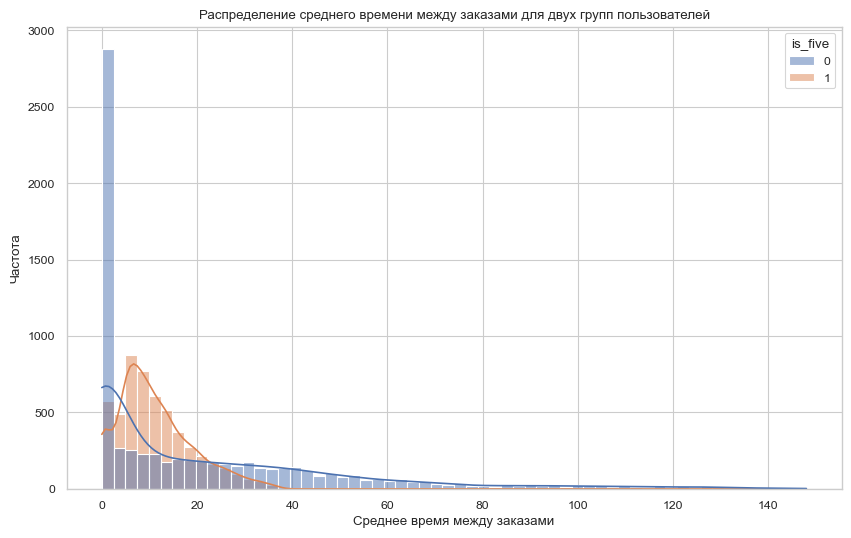

In [89]:
# Выделем только лояльных пользователей в отдельный датафрейм
loyal_users = users_portrait[['days_between_orders_mean', 'is_two', 'is_five']].copy()
# Уберем нелояльных пользователей
loyal_users = loyal_users.loc[loyal_users['is_two'] != 0]

# Строим гистограмму распределения среднего времени между заказами для двух групп пользователей
plt.figure(figsize=(10, 6))
sns.histplot(data=loyal_users,
                  x='days_between_orders_mean',
                  hue='is_five',
                  bins=60,
                  kde=True)
# Настраиваем подписи
plt.title("Распределение среднего времени между заказами для двух групп пользователей")
plt.xlabel("Среднее время между заказами")
plt.ylabel("Частота")
plt.show()

По данным из графика можно отметить, что увеличение временного интервала между заказами обратнопропорционально вероятности повторной покупки для пользователей с 2-4 заказами (`is_five` = 0), причем большая доля таких пользователей делает повторный заказ в день первой покупки. Для пользователей с 5 и более заказами вероятность повторной покупки наивысшая при временном интервале 10-15 дней, после чего также снижается с увеличением среднего количества дней.

[Назад к оглавлению](#toc)

---
### Промежуточный вывод
Резюмируем результаты исследования признаков, влияющих на возврат пользователей:

- **Точки входа**: 
    - в разрезе типа мероприятия точками входа  являются сегменты: 'концерты', 'другое' и 'театр' (доля пользователей для них прилбизительно составляет 44%, 25% и 20% соответсвенно). В остальных четырех сегментах доля составляет не более 6%;
    
    - в разрезе типа устройства точкой входа является сегмент 'mobile'. Доля пользователей для него составляет более 80%;
    
    - в разрезе региона проведения мероприятия точками входа являются условные регионы 'каменевский регион' и 'североярская область' (для них доля пользователей приблизительно составляет 33% и 17% соответственно). В остальных сементах доля не превышает значения 7%;
    
    - в разрезе билетного оператора точками входа можно назвать 5 операторов: 'билеты без проблем' (\~24%), 'мой билет' (\~14%), 'лови билет' (\~13%), 'билеты в руки' (\~12%) и 'облачко' (\~10%). В остальных сементах доля не превышает значения 7%.
    
- **Влияние признаков первого заказа на возвращение и успешные точки входа**:

    - доля вернувшихся пользователей в разрезе типа первого мероприятия варьируется в пределах от \~54% до \~63%. К успешным точкам входа можно отнести семегменты 'выставки' (\~63%), 'театр' (\~62%) и 'концерты' (\~60%). Стоит отметить, что несмотря на то, что сегмент 'выставки' лидирует, на него в общем приходится менее 2% всех юзеров;
    
    - влияние устройства, с которого совершена первая покупка незначительно. Доля вернувшихся пользователей практически одинакова для обоих сегментов и составляет приблизительно 50%. При этом для первого заказа с декстопных устройств процент на 2.9% выше хотя в общем на него приходится только 17% пользователей;
    
    - в разрезе региона влияние на возвращение пользователя рассматривалось только для 10 самых популярных. Среди них найдены успешные точки входа: 'шанырский регион', 'светополянский округ', 'широковская область' и 'светоярская область', для которых доля вернувшихся пользователей составляет более 60%. При этом 'светоярская область' и 'широковская область' занимают 2-е и 3-е места по общему количеству пользователей;
 
    - доля вернувшихся пользователей в разрезе билетного оператора рассматривалось только для 10 самых популярных. Доля вернувшихся пользователей варьируется в пределах в пределах от 58 до 64%. К успешным точкам входа можно отнести операторов 'край билетов' (\~64%) и 'дом культуры' (\~63%), хотя они и занимают 9-е и 10-е места по общему количеству пользователей.
    
- **Проверка продуктовых гипотез**:

    - гипотеза 1 не верна. Тип мероприятия действительно влияет на вероятность возврата на Яндекс Афишу, однако пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ реже, чем пользователи, оформившие свой первый заказ на концерты;
    
    - гипотеза 2 не верна. Наибольшие доли пользователей с двумя и более заказами имеют регионы с 7-м и 8-м местам по количеству пользователей.
    
- **Влияние средней выручки сервиса с заказа на повторные заказы**

    - Для пользователей с одной покупкой характерна низкая стоимость заказа или совершение заказов с нулевой выручкой. По мере увеличения стоимости заказа снижается доля пользователей с одной покупой. Для пользователей более чем с двумя заказами, в свою очередь, максимум концентрации наблюдается при стоимости заказа в промежутке от от 500-600 руб, хотя также есть значительная доля 'бесплатных' заказов.
    
    - Пользователи, совершившие более 5-и заказов, чаще совершают покупки более дорогих билетов в сравнении с пользователями с 2-4 заказами.

- **Влияние среднего количества билетов в заказе на вероятность повторной покупки**

    - пользователи распределены по сегментам неравномерно. Для сегмента 'от 2 до 3 билетов' общее количество пользователей наибольшая. Также для данного сегмента наибольшая доля пользователей, совершивших повторный заказ составляет более 70%;
    
    - сегмент 'от 5 и более билетов' самый малочисленный и пользователи с наименьшей вероятностью совершают повторную покупку (~30%) в сравнении с другими сегментами;
    
    - более половины всех пользователей сегментов 'от 2 до 3 билетов' и 'от 3 до 5 билетов' совершают повторную покупку, в то время как доля совершивших повторных заказ для групп от '1 до 2 билетов' и 'от 5 и более билетов' составляет ~40% и ~32% соответственно;
    
    - Аномально высоких или низких значений доли пользователей, совершивших повторную покупку не наблюдается. Чаще всего мероприятия посещяются 2-3 людьми (т.е. приобретается 2-3 билета), ввиду чего и вероятность сделать подобный заказ выше. Собрать 5 и более людей для посещения мероприятия скорее является единичным случаем для определенного концерта, подобный повторный заказ маловероятен.
    
- **Влияние дня недели первой покупки на повторные покупки**

    - распределение 1-ого заказа пользователей по дням неделе почти равномерное, однако в пятницу и субботу наблюдается незначительное увеличение (на 1-3%) частоты первых заказов;
    
    - распределение доли пользователей, совершивших повторный заказ почти равномерное и колеблется в пределах от ~58% до ~62%. Можно сказать, что день недели не вляет на вероятность повторного заказа.
    

- **Влияние среднего интервала между заказами на удержание клиентов**

    - Увеличение временного интервала между заказами обратнопропорционально вероятности повторной покупки для пользователей с 2-4 заказами, причем большая доля таких пользователей делает повторный заказ в день первой покупки. Для пользователей с 5 и более заказами вероятность повторной покупки наивысшая при временном интервале 10-15 дней, после чего также снижается с увеличением среднего количества дней.

<a id="корреляционный-анализ-количества-покупок-и-признаков-пользователя"></a>
### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Рассчитаем коэффициент корреляции phi_k между признаками профиля пользователя и числом заказов (`total_orders`).

In [90]:
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

# Считаем матрицу корреляции
corr_matrix = users_portrait[['total_orders',
                              'order_dt_first',
                              'revenue_rub_mean',
                              'tickets_mean',
                              'days_between_orders_mean',
                              'device_type_canonical',
                              'region_name',
                              'service_name',
                              'event_type_main',
                              'week_day']].phik_matrix()

# Убираем все столбцы кроме total_orders
corr_matrix = corr_matrix.loc[corr_matrix.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)
# Отображаем
corr_matrix.style.format('{:.2f}')

interval columns not set, guessing: ['total_orders', 'revenue_rub_mean', 'tickets_mean', 'days_between_orders_mean']


,total_orders
days_between_orders_mean,0.49
tickets_mean,0.43
order_dt_first,0.40
revenue_rub_mean,0.27
device_type_canonical,0.05
service_name,0.04
event_type_main,0.03
region_name,0.02
week_day,0.02


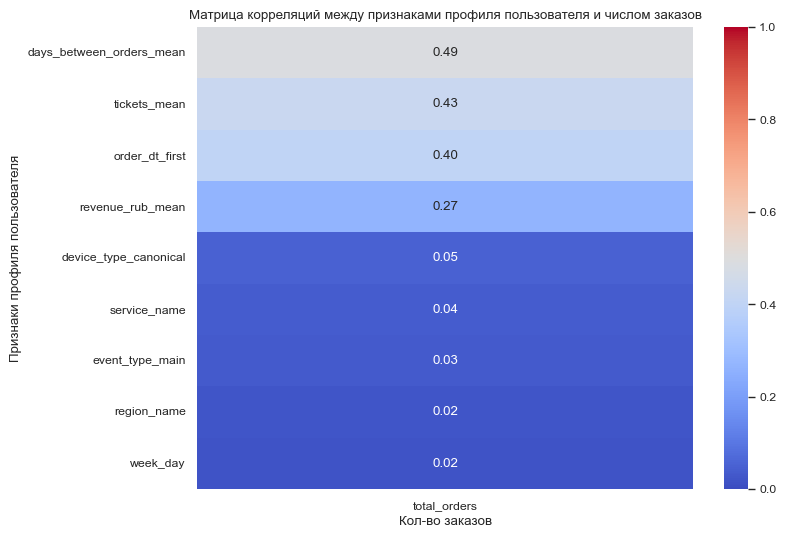

In [91]:
# Визуализируем результат с помощью тепловой карты
plt.figure(figsize=(8, 6))

sns.heatmap(
    corr_matrix, 
    annot=True,     # Пишем значения внутри ячеек
    cmap='coolwarm', # Цветовая гамма (синий-белый-красный)
    fmt=".2f",      # Формат чисел (2 знака после запятой)
    vmin=0, vmax=1 # Фиксируем границы цветов (от -1 до 1)
)

plt.title("Матрица корреляций между признаками профиля пользователя и числом заказов")
plt.xlabel('Кол-во заказов')
plt.ylabel('Признаки профиля пользователя')
plt.show()

По данным, представленным на тепловой карте можно отметить:
-  количество совершенных заказов умеренно коррелирует со средним кол-вом дней между заказами (phi_k=0.49), cо средним количеством билетов в заказе (phi_k=0.43) и датой первого заказа (phi_k=0.40);
- кореляция количества совершенных заказов с другими признаками профиля пользователя фатически отстуствует.

Визуализируем корреляцию данных в столбцах `total_orders` и `tickets_mean`.

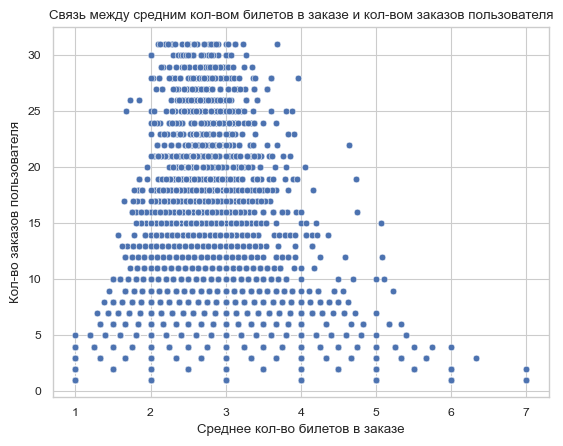

In [92]:
# Строим график
sns.scatterplot(data=users_portrait, x='tickets_mean', y='total_orders')
plt.title('Связь между средним кол-вом билетов в заказе и кол-вом заказов пользователя')
plt.xlabel('Среднее кол-во билетов в заказе')
plt.ylabel('Кол-во заказов пользователя')
plt.show()

Из графика видно, что с увеличением количества заказов среднее количество билетов в заказе уменьшается до значений 2-4 шт. То есть чем меньше заказов совершил пользователь, тем вероятнее покупка более 5-ти билетов за раз.

Визуализируем корреляцию данных в столбцах `total_orders` и `order_dt_first`.

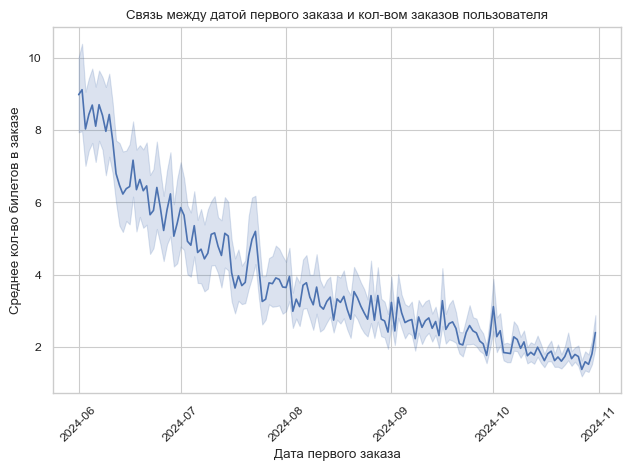

In [93]:
# Сортируем датафрейм по дате
users_portrait = users_portrait.sort_values(by='order_dt_first')

# Строим график
sns.lineplot(data=users_portrait, x='order_dt_first', y='total_orders')
plt.title('Связь между датой первого заказа и кол-вом заказов пользователя')
plt.ylabel('Среднее кол-во билетов в заказе')
plt.xlabel('Дата первого заказа')
plt.xticks(rotation=45)
plt.tight_layout()

Из графика видно, что чем позже пользователь совершил первый заказ, тем меньше общее кол-во заказов.

Визуализируем корреляцию данных в столбцах `total_orders` и `days_between_orders_mean`.

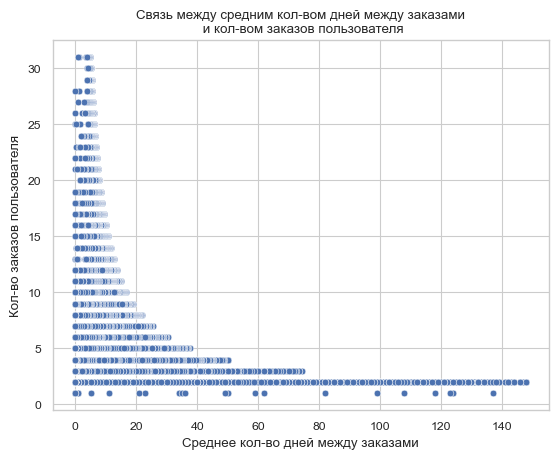

In [94]:
# Строим график
sns.scatterplot(data=users_portrait, x='days_between_orders_mean', y='total_orders')
plt.title('Связь между средним кол-вом дней между заказами\n и кол-вом заказов пользователя')
plt.xlabel('Среднее кол-во дней между заказами')
plt.ylabel('Кол-во заказов пользователя')
plt.show()

Из графика видно, что чем меньше среднее количество дней между заказами, тем больше общее кол-во заказов.

---
### Промежуточный вывод
Рассчет коэффициента корреляции phi_k между признаками профиля пользователя и числом заказов показал следующее:
- существует умеренная отрицательная корреляция общего кол-ва заказов пользователя со средним числом билетов в заказе (phi_k=0.43). Чем меньше заказов совершил пользователь, тем вероятнее покупка более 5-ти билетов за раз.
- существует умеренная отрицательная корреляция общего кол-ва заказов пользователя с датой первой покупки (phi_k=0.40). Чем позже пользователь совершил первый заказ, тем меньше общее кол-во заказов.
- существует умеренная отрицательная корреляция общего кол-ва заказов с средним количеством дней между заказами (phi_k=0.49). Чем меньше среднее количество дней между заказами, тем больше общее кол-во заказов.

[Назад к оглавлению](#toc)

<a id="общие-выводы-и-рекомендации"></a>
## 5. Общие выводы и рекомендации

**1. Общий обзор проделанной работы.**

В ходе исследования с помощью SQL-запроса из БД Яндекс Афиши были выгружены поля, позволяющие изучить поведение пользователей и провести оценку критериев возврата на площадку. После выгрузки получили датфрейм `df`, содержащий 290611 строк и 15 столбцов необходимой информации. После этого в датафрейме `df` была проведена предобработка данных, в рамках которой:

- данные о выручке были приведены к единой валюте - рублям;
- датафрейм был отфильтрован по 2-ум критериям: по 99-у процентилю выручки и значению 7 шт. в столбце с кол-вом билетов;
- удалены строки с отрицательными значениями в столбцах с выручкой;
- понижена разрядность числовых столбцов и приведены к категориальному типу текстовые столбцы с небольшим количеством уникальных значений, что значительно уменьшило объем памяти, занимаемый датафреймом.

После предобработки по данным из `df` был составлен датафрейм `users_portrait` с агрегированными признаками, описывающими поведение и профиль пользователя. При работе с `users_portrait` были выялены аномальные значения по показателю общего количества заказов, ввиду чего данные были отфильтрованны по 95-у процентилю столбца `total_orders`. Далее был проведен исследовательский анализ по данным, представленным в `users_portrait`, где было изучено влияние признаков пользователя на вероятность повторной покупки.

**2. Главные выводы.**

- **Общая информация о выборке**:
    - Количество пользователей в выборке: 21828
    - Cредняя выручка с одного заказа: 543.84
    - Доля пользователей, совершивших 2 и более заказа: 61.7%
    - Доля пользователей, совершивших 5 и более заказов: 28.99%

- **Признаки первого заказа связаные с возвратом пользователей**:
    Наиболее сильное влияение на возврат пользователя оказали: тип первого мероприятия, регион проведения и билетный опреатор:
    - Успешные точки входа в разрезе мероприятия - это категории 'выставки', 'театр', и 'концерты', для них в среднем на 5% выше вероятность повторной покупки.
    - Успешные точки входа в разрезе региона - 'шанырский регион', 'светополянский округ', 'широковская область' и 'светоярская область', для них в среднем на 3-5% выше вероятность повторной покупки.
    - Успешные точки входа в разрезе билетного оператора - 'край билетов' и 'дом культуры', для них в среднем на 3-4% выше вероятность повторной покупки.

- **Проверка продуктовых гипотез**: обе гипотезы были опровергнуты.

- **Влияние средней выручки сервиса с заказа на повторные заказы**:
    - Для пользователей с одной покупкой характерна низкая стоимость заказа или совершение заказов с нулевой выручкой.
    - Для пользователей более чем с двумя заказами максимум концентрации стоимости заказа лежит в промежутке от 500-600 руб, хотя также есть значительная доля 'бесплатных' заказов.
    - Пользователи, совершившие более 5-и заказов, чаще прочих совершают покупки более дорогих билетов.

- **Влияние среднего количества билетов в заказе на вероятность повторной покупки**: 
  - Пользователи, оформляющие в заказе в среднем 1-2 билета с вероятностью \~40% совершат повторный заказ
  - Пользователи, оформляющие в заказе в среднем 2-3 билета с вероятностью \~70% совершат повторный заказ.
  - Пользователи, оформляющие в заказе в среднем от 5 и более билетов с наименьшей вероятностью совершают повторную покупку (\~30%)

-  **Влияние временных характеристик на удержание клиентов**:
    - Увеличение временного интервала между заказами обратнопропорционально вероятности повторной покупки для пользователей с 2-4 заказами, причем большая доля таких пользователей делает повторный заказ в день первой покупки. Для пользователей с 5 и более заказами вероятность повторной покупки наивысшая при временном интервале 10-15 дней, после чего также снижается с увеличением среднего количества дней.
    - День недели, в которую была совершена покупка не влияет на удержание клиентов


- **Связь характеристик первого заказа и профиля пользователя с числом покупок**: в ходе корреляционного анализа было выявлено, что существует умеренная отрицательная корреляция общего кол-ва заказов с средним числом билетов в заказе (чем больше заказов, тем вероятнее, что количество билетов в заказе будет принимать значение 2-3 шт.), с датой первой покупки (чем позже пользователь совершил первый заказ, тем меньше общее кол-во заказов) и со средним количеством дней между заказами (чем меньше среднее количество дней между заказами, тем больше общее кол-во заказов).


**3. Рекомендации на основе анализа данных.**
- Пользователи, совершившие 1-ую покупку на мероприятие категории 'выставка' с наибольшей вероятностью совершают повторную покупку в разрезе типа мероприятий, при этом на эту категорию в общем приходится менее 2% всех новых юзеров. Возможно стоит на главной странице сайта/приложения 'подсветить' эту категорию для привлечения внимания потенциально лояльных пользователей.
- Учитывая то, что наибольшие доли пользователей с двумя и более заказами имеют регионы с 7-м (шанырский регион) и 8-м (светополянский округ) местами по количеству пользователей рекоментуется в указанных регионах провести рекламную компанию сервиса, тем самым есть вероятность привлечь новых потенциально лояльных клиентов.
- Лояльные пользователи, регулярно пользующиеся сервисом, имеют тенденцию к покупке не более 2-3 билетов в заказе. Для увеличения показателя среднего количества билетов в заказе для таких пользователей может быть уместно созддание реферальной программы, что может во-первых привлечь новых пользователей, а во-вторых сохранить интерес лояльных юзеров к покупке большего числа билетов.
- Увеличение временного интервала между заказами обратнопропорционально вероятности повторной покупки. Возможно стоит проработать push-уведомления с грядущими мероприятиями для стимуляции пользования сервисом.

[Назад к оглавлению](#toc)

<a id="финализация-проекта-и-публикация"></a>
## 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполним следующие действия:

1. Создадим файл `.gitignore`. Добававим в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируем файл `requirements.txt`. Зафиксируем все библиотеки, которые были использованы в проекте.
3. Вынесем все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверим, что проект запускается и воспроизводим.
5. Загрузим проект в публичный репозиторий GitHub.

[Назад к оглавлению](#toc)